**DOMAIN:** Semiconductor manufacturing process


---



**CONTEXT:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a
specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.
Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then
feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to
learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and
trying out different combinations of features, essential signals that are impacting the yield type can be identified.


---



**DATA DESCRIPTION:** signal-data.csv : (1567, 592)

The data consists of 1567 datapoints each with 591 features.

The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.


---



 **PROJECT OBJECTIVE:** We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.


---



# **STEPS AND TASKS:**


---



# **1. Import and understand the data.**


---



> ## **1.A. Import ‘signal-data.csv’ as DataFrame.**


---



In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your CSV file
file_path = '/content/drive/My Drive/GREAT LEARNING MATERIALS/Module 6: Featurization, Model Selection & Tuning/project/signal-data.csv'

Mounted at /content/drive


In [2]:
pd.options.display.max_columns = None

In [3]:
# Read CSV into a DataFrame
data = pd.read_csv(file_path)

In [4]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.

In [5]:
data.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

In [6]:
object_columns = data.select_dtypes(include='object').columns
print("Columns with 'object' datatype:")
print(object_columns)

Columns with 'object' datatype:
Index(['Time'], dtype='object')


In [7]:
data.shape

(1567, 592)

There is only one column, the **Time** column, that is non numercial. The other columns are numerical.

> ## **1.B. Print 5 point summary and share at least 2 observations.**


---


In [8]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1543.000000,1543.000000,1566.0,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.0,1566.000000,1566.000000,1566.0,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1560.000000,1561.000000,1561.000000,1561.000000,1560.000000,1560.000000,1560.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.000000,773.000000,773.000000,1561.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1566.000000,1555.000000,226.000000,1567.000000,1567.000000,1567.000000,1516.000000,1516.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.00000,1561.000000,1561.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.000000,549.000000,549.000000,549.000000,852.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1543.000000,1567.000000,1567.000000,1558.000000,1558.00000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1559.000000,1559.000000,1559.000000,1562.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.0

**Column 0:** Ranges from approximately 2743 to 3356 with a mean around 3014 and a median around 3011, which are very close, suggesting normal distribution.

**Column 1:** Has a mean of around 2495 and a median of 2499, which are very close and suggests normal distibution.

**Column 2:** Mean and median are very close suggesting normal distribution.

**Column 3:** Mean of 1396 is greater than the median (1285), suggesting  left skew and possible outliers.

**Column 4:** Mean of 4.19 is significantly greater than the median (1.31), suggesting  left skew and possible outliers.

**Column 5:** The min, max and the mean values are all 100 and the standard deviation is 0, suggesting that all the values are 100.

There are 590 numerical features and the distributions of each feature seems to be varying distinctly, with some being normally distributed, some being skewed with outliers, while some of them being constant.

**Pass/Fail Column (Column 590)**: This column represents the target variable for the pass/fail yield. It has a mean of approximately -0.87 and ranges from -1 to 1. The mean close to -1 might indicate that passes (-1) are more prevalent than failures (1) in the dataset. The target variable seems imbalanced with a majority of entries labeled as -1.

# **2. Data cleansing:**


---



> ## **2.A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.**


---



In [9]:
null_percentages=(data.isnull().sum()/data.shape[0])*100
null_percentages

Time         0.000000
0            0.382897
1            0.446713
2            0.893427
3            0.893427
               ...   
586          0.063816
587          0.063816
588          0.063816
589          0.063816
Pass/Fail    0.000000
Length: 592, dtype: float64

In [10]:
# Threshold for null values (20%)
null_threshold = 20

# List to store columns to be dropped
columns_to_drop = []

In [11]:
columns_with_high_null_percentage = null_percentages[null_percentages > 20]
columns_with_high_null_percentage

72     50.670070
73     50.670070
85     85.577537
109    64.964901
110    64.964901
111    64.964901
112    45.628590
157    91.193363
158    91.193363
220    85.577537
244    64.964901
245    64.964901
246    64.964901
247    45.628590
292    91.193363
293    91.193363
345    50.670070
346    50.670070
358    85.577537
382    64.964901
383    64.964901
384    64.964901
385    45.628590
492    85.577537
516    64.964901
517    64.964901
518    64.964901
519    45.628590
578    60.561583
579    60.561583
580    60.561583
581    60.561583
dtype: float64

In [12]:
columns_with_high_null_percentage.shape

(32,)

There are 32 columns with null percentage greater than 20.

In [13]:
# Loop through each column in the DataFrame
for column, null_percentage in null_percentages.items():
    # Check if the null percentage exceeds the threshold
    if null_percentage >= null_threshold:
        # Add columns with 20% or more null values to the list
        columns_to_drop.append(column)

In [14]:
# Drop columns from the DataFrame with 20% or more null values
data.drop(columns=columns_to_drop, inplace=True)

In [15]:
null_percentages=(data.isnull().sum()/data.shape[0])*100
columns_with_high_null_percentage = null_percentages[null_percentages > 20]
columns_with_high_null_percentage.shape

(0,)

In [16]:
data.shape

(1567, 560)

In [17]:
# Impute null values in remaining columns with the mean of the respective columns
for column in data.columns:
    if data[column].isnull().sum() > 0:
        column_mean = data[column].mean()
        data[column].fillna(column_mean, inplace=True)

In [18]:
null_percentages=(data.isnull().sum()/data.shape[0])*100
columns_with_null_values = null_percentages[null_percentages > 0]
columns_with_null_values.shape

(0,)

There are no columns with missing values.

> ## **2.B. Identify and drop the features which are having same value for all the rows.**


---



In [19]:
# Identify columns with the same value for all rows
columns_to_drop = []

In [20]:
for column in data.columns:
    if data[column].nunique() == 1:
        columns_to_drop.append(column)

In [21]:
# Display the columns dropped
print("Columns dropped with the same value for all rows:")
print(columns_to_drop)

Columns dropped with the same value for all rows:
['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']


In [22]:
len(columns_to_drop)

116

There are 116 columns with same values for each row.

In [23]:
# Drop columns with the same value for all rows
data.drop(columns=columns_to_drop, inplace=True)

In [24]:
data.shape

(1567, 444)

> ## **2.C. Drop other features if required using relevant functional knowledge. Clearly justify the same.**


---


In [25]:
#check for duplicated values in the data
data.duplicated().sum()

0

There are no duplicate rows in the data.

To ensure that we have a good model, we must ensure the no. of columns to be such that the no of rows (1567) are enough to capture all the variables as well as the relationships between all the variables. Solving n+ nC2 = 1567, we get n=55 approximately. Hence, we must ensure that the no of columns finally are less than or equal to 55.

Let's drop the **'Time'** column.

In [26]:
data = data.drop('Time', axis=1)

In [27]:
# Extracting independent features (X) and the target variable (y)
X = data.drop('Pass/Fail', axis=1)  # X contains all columns except 'target_column'
y = data['Pass/Fail']  # y contains only the 'target_column'

In [28]:
X.shape

(1567, 442)

In [29]:
y.shape

(1567,)

Let's calculate the coefficient of variance for all the columns and drop the columns which show less variation acorss the columns.

In [30]:
# Calculate coefficient of variation for each column
coefficient_of_variation = (X.std(numeric_only=True) / X.mean(numeric_only=True)) * 100
absolute_coefficients = abs(coefficient_of_variation)
sorted_absolute_coefficients = absolute_coefficients.sort_values()
len(sorted_absolute_coefficients[sorted_absolute_coefficients<=5])

56

There are 56 columns with variation less than 5% compared to the mean. We will drop these columns.

In [31]:
# Assuming 'columns_to_drop' contains the names of columns with low variation (< 5%)
columns_to_drop = sorted_absolute_coefficients[sorted_absolute_coefficients < 5].index.tolist()

# Dropping columns with low variation from the DataFrame 'X'
X.drop(columns=columns_to_drop, inplace=True)

In [32]:
X.shape

(1567, 386)

Mutual information is a measure that quantifies the mutual dependence or the amount of information shared between two random variables. In the context of feature selection in machine learning, mutual information is used to evaluate the relationship between a feature and the target variable. It assesses how much information about the target variable is contained in the feature.

We will use it to assess the correlation between the independent features and the target variable and drop the features with mutual info score of 0.

In [33]:
from sklearn.feature_selection import mutual_info_classif

# X contains independent features and y contains the binary target (-1 and 1)
mutual_info = mutual_info_classif(X, y, random_state=42)

In [34]:
# Create a DataFrame with column names and their mutual information scores
mutual_info_df = pd.DataFrame({'Column_Name': X.columns, 'Mutual_Info_Value': mutual_info})

# Sort the DataFrame by Mutual_Info_Value in descending order
mutual_info_df = mutual_info_df.sort_values(by='Mutual_Info_Value', ascending=False)
mutual_info_df

,Column_Name,Mutual_Info_Value
169,277,0.028587
378,577,0.028531
21,41,0.028260
314,477,0.026690
63,122,0.024658
...,...,...
38,80,0.000000
219,340,0.000000
224,347,0.000000
226,349,0.000000


In [35]:
columns_to_drop = mutual_info_df[mutual_info_df['Mutual_Info_Value'] == 0]['Column_Name']

In [36]:
len(columns_to_drop)

148

There are 148 features with mutual info score of zero. We will drop these columns.

In [37]:
# Dropping columns with low variation from the DataFrame 'X'
X.drop(columns=columns_to_drop, inplace=True)

In [38]:
X.shape

(1567, 238)

Lets fit a Lasso logistic regression model to the data and reject the features whose coefficients are zero.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression model with L1 regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Evaluate the model
accuracy_train = lasso_model.score(X_train, y_train)
print(f"Accuracy of Lasso Logistic Regression: {accuracy_train:.4f}")

# Evaluate the model
accuracy_test = lasso_model.score(X_test, y_test)
print(f"Accuracy of Lasso Logistic Regression: {accuracy_test:.4f}")

Accuracy of Lasso Logistic Regression: 0.9545
Accuracy of Lasso Logistic Regression: 0.9076


In [40]:
# Obtain the coefficients and feature names
coefficients = lasso_model.coef_[0]
feature_names = X.columns

# Create a DataFrame with coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [41]:
# Filter out features with coefficients equal to 0
non_zero_features = coefficients_df[(coefficients_df['Coefficient'] != 0) & (coefficients_df['Feature'] != 'constant')]['Feature'].tolist()
len(non_zero_features)

138

We are left with 138 non-zero features, whose coefficients in the model are non-zero.

In [42]:
X = X[non_zero_features]

In [43]:
X.shape

(1567, 138)

> ## **2.D. Check for multi-collinearity in the data and take necessary action.**


---


In [44]:
# Calculate the correlation matrix for features in X
correlation_matrix = X.corr()

# Display the correlation matrix
correlation_matrix

,3,6,7,9,14,21,22,24,25,26,29,30,31,33,40,45,51,59,62,65,78,79,81,83,89,91,92,93,98,102,103,104,115,117,125,126,128,129,130,134,136,139,142,143,145,150,155,160,163,164,170,175,177,180,181,183,184,195,210,212,213,227,228,239,280,282,289,297,305,307,310,311,312,316,323,324,333,339,348,352,355,368,376,377,390,405,406,407,410,411,413,416,417,419,424,425,432,433,437,442,443,454,468,471,474,477,480,482,483,485,487,488,489,490,493,494,495,497,500,526,540,541,543,546,550,551,558,560,561,563,571,573,575,576,584,586,588,589
3,1.000000,-0.685835,0.073856,0.068215,-0.019827,0.021111,-0.033141,-0.049605,0.079637,0.036169,-0.013283,0.001712,-0.108653,-0.041229,-0.006463,-0.031329,-0.012499,-0.020691,-0.007548,-0.028134,0.127581,-0.017597,0.046589,0.065339,0.006015,0.042211,-0.069465,0.028304,-0.037826,-0.037987,-0.088995,-0.013955,-0.002689,0.037765,0.113326,0.018798,0.027071,-0.212647,-0.015256,0.042383,0.021363,0.299731,-0.073778,-0.250881,-0.077513,-0.045914,-0.033299,-0.076747,-0.048261,-0.046037,-0.006222,0.050288,0.007652,0.070750,0.043023,-0.020704,-0.024582,-0.004733,-0.034503,-0.026120,-0.052668,-0.084944,-0.027280,0.003037,-0.067551,-0.014728,0.011245,0.041969,-0.006787,-0.000169,0.051510,-0.038788,0.005839,0.048767,0.008875,-0.026751,0.012213,0.012932,-0.056368,-0.028359,-0.039410,-0.030496,-0.052542,-0.007907,0.039578,0.175526,-0.147027,0.013659,-0.005694,-0.230239,0.009818,-0.261347,0.024687,0.033285,-0.005952,0.008997,0.053350,0.017265,0.020674,0.031249,0.003058,0.026487,0.014881,0.018025,0.028147,-0.003181,-0.072706,0.030013,0.026909,-0.010999,0.066520,0.009441,-0.030502,-0.044634,0.013108,-0.019733,0.011414,-0.029903,0.017704,-0.018033,-0.132276,0.024721,0.066932,-0.076269,-0.021563,-0.021069,0.082654,0.013728,0.014912,-0.023033,-0.017820,0.013163,0.006909,0.008216,0.024736,0.034711,-0.033645,-0.080341
6,-0.685835,1.000000,0.013169,-0.049389,0.055333,-0.021131,0.035590,0.057480,-0.098125,-0.046931,0.053750,0.028572,0.115955,0.002817,0.014575,0.029945,0.053057,0.057800,0.053272,-0.003449,-0.177572,0.064688,-0.037825,-0.083385,-0.016725,-0.019456,0.047273,-0.036154,0.061335,0.044658,0.052738,-0.000918,-0.024270,-0.035948,-0.114317,-0.012954,0.005568,0.204966,0.018148,-0.021065,-0.025010,-0.418355,-0.160978,0.236263,0.079881,0.079507,0.010430,0.055111,0.047740,0.042404,0.012492,-0.077521,-0.005446,-0.087154,-0.041843,0.026140,0.002338,0.002719,0.019196,0.018590,0.058242,0.086990,0.018436,-0.001874,0.075374,0.030400,0.000665,-0.093579,0.006396,-0.000818,-0.083131,0.040221,-0.003273,-0.073918,-0.026460,0.038605,0.021404,-0.030489,0.033249,0.010900,0.036642,0.020570,0.066384,0.001047,-0.041378,-0.156330,0.103401,-0.005120,0.008407,0.205593,-0.056450,0.234682,-0.043188,-0.062485,-0.017212,0.036069,-0.017815,-0.042839,-0.029957,-0.034048,-0.003028,0.027095,-0.046208,0.002904,-0.027779,0.043670,0.090244,-0.016502,-0.042417,0.022466,-0.067299,-0.025759,0.030266,0.039039,-0.025669,0.019779,-0.012311,0.011930,-0.035984,0.050680,0.094669,-0.013764,-0.082354,0.048833,0.016154,0.048452,-0.033026,-0.010948,-0.041082,-0.022655,0.026100,-0.011929,-0.009778,0.007409,-0.037813,-0.041209,0.032227,0.043777
7,0.073856,0.013169,1.000000,-0.092075,-0.003435,-0.042681,0.021177,0.007342,-0.025209,-0.007159,-0.018396,-0.027895,0.042642,-0.009788,-0.029685,-0.045862,0.033446,0.011751,-0.033145,0.003042,-0.024778,0.048347,0.027729,0.010255,0.004015,0.050192,0.021219,-0.033207,0.006566,-0.031254,0.014818,0.017084,-0.034561,0.004346,-0.018491,0.014243,-0.024037,-0.002871,-0.002893,0.072096,-0.052773,0.016804,-0.277468,0.248923,-0.033385,0.014107,-0.185732,0.006790,0.005338,-0.016762,0.094240,0.006293,0.037578,0.015736,-0.054120,-0.004822,-0.006752,0.016323,-0.005772,0.012240,-0.000205,-0.003151,-0.007944,0.019134,-0.036736,0.006519,-0.021157,0.027721,0.096648,0.005920,0.000632,-0.012492,0.035974,-0.000683,0.000211,-0.011046,0.009354,0.008464,-0.014065,-0.023978,-0.051165,-0.012376,0.028623,0.033978,0.002813,-0.013824,0.095875,0.014465,-0.018358,-0.117838,-

We will find those pairs whose correlations in the matrix is among themselves are greater than 0.75 or less than -0.75.

In [45]:
# Set the threshold for correlation (greater than 0.75 or less than -0.75)
threshold = 0.75

# Find pairs with correlation above the threshold
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display pairs with correlation above the threshold
print(f"Pairs with correlation > {threshold} or < -{threshold}:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

Pairs with correlation > 0.75 or < -0.75:
25 - 26: 0.8231111215973265
26 - 164: -0.7717410708398639
29 - 30: 0.8581473047890565
117 - 390: 0.9862339054518433
143 - 416: 0.9983535268348297
145 - 280: 0.9597816072041465
163 - 164: 0.9248163707333443
170 - 305: 0.961749880056381
175 - 310: 0.9550617995202938
177 - 312: 0.9971297572419839
180 - 316: 0.8810806443748563
210 - 348: 0.9497334829668724
228 - 368: 0.7949160889058089
239 - 377: 0.9544868890306727
282 - 289: 0.8094937833004291
282 - 425: 0.86854544715844
289 - 425: 0.8602359260968141
307 - 443: 0.9588636836094995
333 - 477: 0.8484568797666552
339 - 471: 0.7850260428631133
406 - 540: 0.9680331044954442
407 - 541: 0.9124005362210873
560 - 561: 0.8197068129718315
573 - 575: 0.9802654170338578
573 - 576: 0.7900259562350281
575 - 576: 0.7808402436837106


We will now drop one of the feature in each of the high correlation pairs based on lower mutual info scores with the target column.

In [46]:
# Iterate through high correlation pairs
for pair in high_correlation_pairs:
    feature1, feature2, correlation = pair

    # Check if the columns exist in X before attempting to drop
    if feature1 in X.columns:
        # Find mutual information values for features in the pair
        mutual_info_1 = mutual_info_df.loc[mutual_info_df['Column_Name'] == feature1, 'Mutual_Info_Value'].values[0]

        if feature2 in X.columns:
            mutual_info_2 = mutual_info_df.loc[mutual_info_df['Column_Name'] == feature2, 'Mutual_Info_Value'].values[0]

            # Drop the feature with lower mutual info from each highly correlated pair
            if mutual_info_1 < mutual_info_2:
                print(f"Dropping '{feature1}'.")
                X.drop(columns=[feature1], inplace=True)  # Drop feature1 from the dataset (X)
            else:
                print(f"Dropping '{feature2}'.")
                X.drop(columns=[feature2], inplace=True)  # Drop feature2 from the dataset (X)
        else:
            print(f"Column '{feature2}' not found in X. Skipping drop operation for '{feature1}'.")
    else:
        print(f"Column '{feature1}' not found in X. Skipping drop operation.")

Dropping '26'.
Column '26' not found in X. Skipping drop operation.
Dropping '30'.
Dropping '117'.
Dropping '143'.
Dropping '280'.
Dropping '164'.
Dropping '170'.
Dropping '175'.
Dropping '177'.
Dropping '316'.
Dropping '348'.
Dropping '228'.
Dropping '239'.
Dropping '282'.
Column '282' not found in X. Skipping drop operation.
Dropping '425'.
Dropping '307'.
Dropping '333'.
Dropping '471'.
Dropping '540'.
Dropping '541'.
Dropping '560'.
Dropping '573'.
Column '573' not found in X. Skipping drop operation.
Dropping '576'.


In [47]:
X.shape

(1567, 115)

We are now left with 115 features.

Let's run another lasso model on the remaining features and see whether we can further reduce some dimensions.

In [48]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Logistic Regression model with L1 regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Evaluate the model
accuracy_train = lasso_model.score(X_train, y_train)
print(f"Accuracy of Lasso Logistic Regression (train): {accuracy_train:.4f}")

# Evaluate the model
accuracy_test = lasso_model.score(X_test, y_test)
print(f"Accuracy of Lasso Logistic Regression (test): {accuracy_test:.4f}")

Accuracy of Lasso Logistic Regression (train): 0.9497
Accuracy of Lasso Logistic Regression (test): 0.9140


In [49]:
# Obtain the coefficients and feature names
coefficients = lasso_model.coef_[0]
feature_names = X.columns

# Create a DataFrame with coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [50]:
# Filter out features with coefficients equal to 0
non_zero_features = coefficients_df[(coefficients_df['Coefficient'] != 0) & (coefficients_df['Feature'] != 'constant')]['Feature'].tolist()
len(non_zero_features)

109

In [51]:
X = X[non_zero_features]

In [52]:
X.shape

(1567, 109)

Now, we are left with 109 features.

Let's run several cycles of Lasso regualarization model to further reduce the number of dimensions.

In [53]:
# Loop for 20 iterations
for i in range(20):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create a Logistic Regression model with L1 regularization (Lasso)
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

    # Fit the model to the training data
    lasso_model.fit(X_train, y_train)

    # Obtain the coefficients and feature names
    coefficients = lasso_model.coef_[0]
    feature_names = X.columns

    # Create a DataFrame with coefficients and feature names
    coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

    # Filter out features with coefficients equal to 0
    non_zero_features = coefficients_df[(coefficients_df['Coefficient'] != 0) & (coefficients_df['Feature'] != 'constant')]['Feature'].tolist()

    # Update X with non-zero coefficient features
    X = X[non_zero_features]

In [54]:
# Evaluate the model
accuracy_train = lasso_model.score(X_train, y_train)
print(f"Accuracy of Lasso Logistic Regression (train): {accuracy_train:.4f}")

# Evaluate the model
accuracy_test = lasso_model.score(X_test, y_test)
print(f"Accuracy of Lasso Logistic Regression (test): {accuracy_test:.4f}")
X.shape

Accuracy of Lasso Logistic Regression (train): 0.9346
Accuracy of Lasso Logistic Regression (test): 0.9490


(1567, 53)

By running several cycles of Lasso regualrization and dropping columns, we are able to reduce the number of dimensions to 53.

Lets check whether there is any multicollinearity in the dataset.

In [55]:
# Set the threshold for correlation (greater than 0.75 or less than -0.75)
# Calculate the correlation matrix for features in X
correlation_matrix = X.corr()

# Display the correlation matrix
correlation_matrix
threshold = 0.75

# Find pairs with correlation above the threshold
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display pairs with correlation above the threshold
print(f"Pairs with correlation > {threshold} or < -{threshold}:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

Pairs with correlation > 0.75 or < -0.75:


Thus we have 53 several independent features after feature engineering.

In [56]:
data = pd.DataFrame(X)
data['Target'] = y

In [57]:
data.head()

,9,14,21,25,33,40,45,59,62,81,98,102,103,104,126,129,130,134,142,145,155,180,183,210,227,311,312,324,352,355,368,376,390,405,407,411,416,419,424,432,433,437,443,474,480,485,487,488,500,550,563,575,588,Target
0,0.0162,7.9558,-5419.00,0.8955,9.5126,61.29,130.3691,-1.7264,108.6427,-0.0567,0.3974,0.1350,-0.0042,0.0003,3.353,-0.0473,0.7243,39.2373,6.78,0.0850,0.41,20.95,16.713,0.0772,0.0744,0.1431,0.0610,18.0118,0.0206,0.0491,0.0114,0.0010,0.9967,0.0151,1.4392,2.1118,2.7380,0.0000,2.4788,26.3617,49.0013,3.1136,0.6288,13.6778,115.7408,178.1759,0.0000,53.1098,0.0000,12.93,0.679641,0.1026,0.005283,-1
1,-0.0005,10.1548,-5441.50,1.2973,9.7997,78.25,133.1727,0.8073,113.9800,-0.0377,-0.9353,-0.0752,-0.0045,0.0002,2.771,-0.0946,0.8122,37.9213,5.70,0.0600,0.35,17.99,16.358,0.0566,0.0203,0.0856,0.1214,23.6230,0.0143,0.0365,0.0033,0.0022,1.1655,0.0120,1.0323,2.5197,3.9300,368.9713,3.1531,8.4887,199.7866,3.2153,0.8123,13.2430,163.0249,359.0444,820.7900,194.4371,0.0000,16.00,0.679641,0.0772,0.006000,-1
2,0.0041,9.5157,-5447.75,1.3122,8.6590,14.37,131.8027,23.8245,115.6273,-0.0182,-0.1427,0.0134,-0.0026,-0.0016,3.094,-0.1892,0.8194,42.0579,8.33,0.0483,0.47,17.78,22.912,0.0339,0.0192,0.1175,0.1261,16.0104,0.0116,0.0383,0.0037,0.0021,1.2356,0.0190,1.1798,2.0627,3.0609,0.0000,2.0261,18.7546,109.5747,3.1281,0.6263,45.5423,93.9245,190.3869,74.0741,191.7582,0.0000,16.16,0.903200,0.0640,0.014800,1
3,-0.0124,9.6052,-5468.25,1.3137,8.6789,76.90,131.8027,24.3791,116.1818,0.0028,0.0177,-0.0699,-0.0059,0.0003,2.480,0.2838,0.7244,41.1025,5.51,0.0393,0.35,16.22,22.562,0.1248,0.0152,0.0973,0.1675,15.7375,0.0224,0.0484,0.0034,0.0024,1.1135,0.0155,1.1907,2.1737,2.4643,0.0000,3.6091,76.0354,181.2641,2.7013,0.5183,48.4887,149.4399,88.5553,71.7583,0.0000,711.6418,131.68,0.651100,0.0525,0.004400,-1
4,-0.0031,10.5661,-5476.25,1.2887,8.7677,76.39,176.3136,-12.2945,144.0191,-0.0123,-0.6704,0.0696,-0.0045,0.0002,3.027,-0.5677,0.7780,38.1448,3.64,0.0451,0.43,15.24,37.715,0.0915,0.0227,0.0582,0.3574,23.1160,0.0256,0.0463,0.0027,0.0025,0.8495,0.0165,1.1704,2.1850,3.3208,866.0295,2.9734,43.8119,0.0000,6.2069,0.6076,19.1303,140.1953,240.1781,587.3773,748.1781,0.0000,19.63,0.679641,0.0706,0.004400,-1


> ## **2.E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.**


---


**Data Overview:**
The initial dataset contains 1567 rows and 592 columns, including the target column. To ensure a reliable model, we aimed for a maximum number of columns (n) such that n + nC2 = 1567, approximately 55. This gives us a rough idea of the dimensionality required to capture information among columns and their relationships.

**Handling Null Values:**
* Checked the percentage of null values in each column. Dropped 32 columns with null values greater than 20%, leaving us with 560 features.
* Imputed null values of remaining columns with their corresponding means.

**Removing Constant Value Columns:**
* Identified and dropped 116 columns having constant values for each row, resulting in 443 columns (excluding the target column).


**Removing Redundant Columns:**
*Checked for duplicate rows, but none existed.
* Dropped the 'Time' column as it contains time stamps unlikely to affect the output column.

**Handling Coefficient of Variance:**
* Calculated the coefficient of variance for all columns and dropped 56 columns showing less than 5% variation across columns.
* This left us with 386 columns.

**Mutual Information Filtering:**
* Mutual information is a measure that quantifies the mutual dependence or the amount of information shared between two random variables. In the context of feature selection in machine learning, mutual information is used to evaluate the relationship between a feature and the target variable. It assesses how much information about the target variable is contained in the feature.
* Calculated mutual information for each column with respect to the target variable.
* Dropped 148 columns with mutual information score of 0, resulting in 238 columns.

**Lasso Logistic Regression:**
* Applied Lasso logistic regression and rejected features with coefficients equal to zero. This step left us with 138 columns.

**Checking for multicollinearity**
* Checked for multicollinearity and dropped column pairs with correlation greater than 0.75 or less than -0.75. Kept the column with higher mutual info score. Ended up with 115 columns.

**Iterative Lasso Model Fitting:**
* Ran several iterations of fitting Lasso model on the data and dropping columns with zero coefficients. After iterations, ended up with 53 columns.

**Final Checks:**
* Checked for multicollinearity again, and no pair exhibited high correlation.
Concluded with a final dataset containing 53 columns (excluding the target variable) and 1567 rows.

**Assumptions:**
* **Null Value Handling and Imputation:** Null values in the dataset may be a result of measurement errors or missing data. Imputing missing values with the mean is a reasonable approach under the assumption that missing values are missing completely at random and imputing with the mean does not introduce bias.
* **Removing Constant Value Columns:** Columns with constant values for each row do not provide meaningful information for predictive modeling. Dropping such columns assumes that they do not contribute to the variability in the target variable.
* **Handling Coefficient of Variance:** Features with low variation across the dataset may not provide significant discriminatory information. The decision to drop columns with less than 5% variation assumes that such features are less informative for predictive modeling.
* **Mutual Information Filtering:** Features with zero mutual information with the target variable may not contribute valuable information for predicting the Pass/Fail yield. Dropping features with mutual information score of 0 assumes that they do not contain relevant information about the target variable.
* **Lasso Logistic Regression:** Lasso logistic regression is effective in selecting relevant features and penalizing coefficients effectively. The assumption here is that features with zero coefficients in the Lasso model are less informative for predicting the target variable.
* **Multicollinearity Handling:** Multicollinearity can affect the stability and interpretability of the model. The decision to drop one of the columns from pairs exhibiting high correlation assumes that keeping both features may introduce redundancy and instability.
* **Iterative Lasso Model Fitting:** Iterative Lasso model fitting helps in progressively selecting a subset of features with non-zero coefficients. The assumption is that features with zero coefficients in multiple iterations are less critical for the model's predictive performance.
* After all the iterations and steps, the dataset with 53 columns is considered sufficient to capture essential information for predicting the Pass/Fail yield. The assumption is that the remaining features adequately represent the underlying patterns in the data.

**SCOPE:**

* **Principal Component Analysis (PCA):** Apply PCA to identify principal components that can replace or complement the existing features. This can be beneficial in scenarios where high dimensionality might impact model performance or interpretability.
* **Hyperparameter Tuning:** Experiment with different hyperparameter values, perform cross-validation, and use grid search or random search to find the best combination of hyperparameters.
* **Model Selection:** Try models like Random Forest, Support Vector Machines, or Gradient Boosting. Compare their performance using appropriate evaluation metrics.

* **Cross-Validation and Robust Evaluation:** Ensure the model's performance is robust and not overfitting to the training data. Use cross-validation techniques to assess the model's generalization ability.

# **3. Data analysis & visualisation:**


---



> ## **3.A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.**


---


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Get numerical columns
numerical_cols = data.select_dtypes(include='number').columns

# Plot histograms with KDE and boxplots for each numerical column
for column in numerical_cols:
    # Create a figure with two subplots (for histogram with KDE and boxplot)
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Plot histogram with KDE
    sns.histplot(data=data, x=column, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Histogram with KDE for {column}')
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Frequency/Density')

    # Plot boxplot
    sns.boxplot(data=data, x=column, color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Boxplot for {column}')
    axes[1].set_xlabel('Values')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()



Output hidden; open in https://colab.research.google.com to view.

* The boxplot and the histogram gives us an idea regarding the presence of outliers and the distribution of various columns.
* The features follow distinct and varying distribution patterns with some features being normally distributed, while others being skewed or unsymmetrical. Also some columns contain heavy outliers, while some contain minimal outliers.
* Since we do not have any information regarding the features, we cannot decide the genuineness of the outliers.
* For instance, Columns 9 and 14 follow almost symmetrical distribution.
* Column 21 is multi modal with two peaks and is also right skewed with significant outliers on the right.
* Column 25 is multi modal with two peaks and is left skewed with significant outliers on the left.

From the above plot, we can analyze the distributions of the other columns.

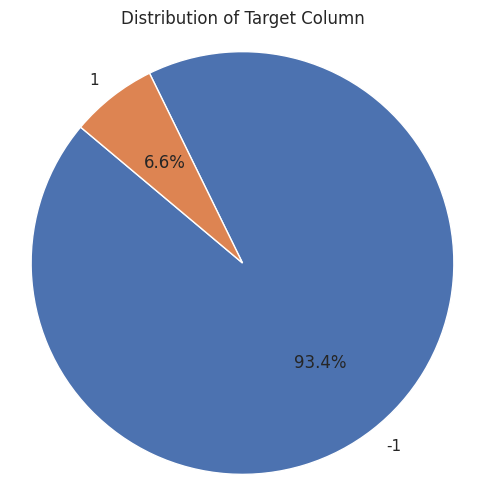

In [ ]:
# Count the occurrences of each category in the 'Target' column
target_counts = data['Target'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The target column is heavily imbalanced with 93.4% of the values being -1(pass) and only 6.6% of the values being 1(fail).

> ## **3.B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.**


---


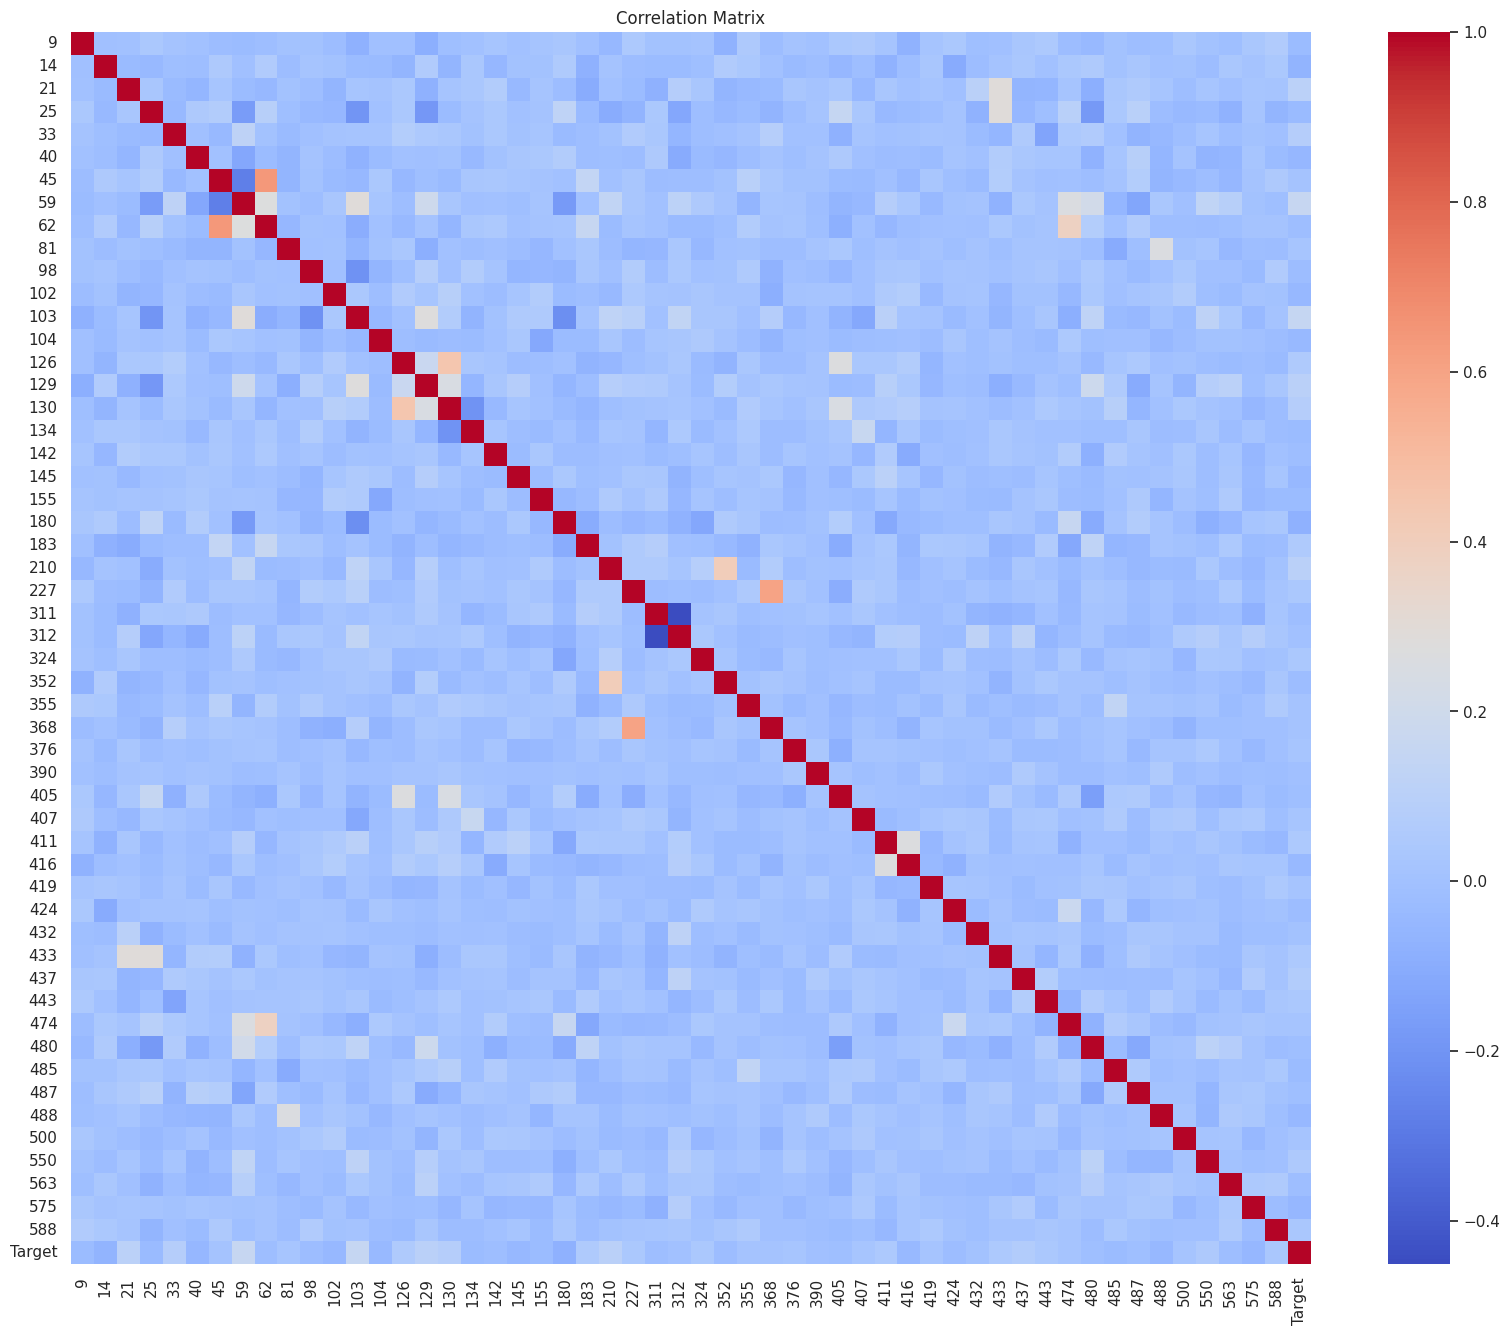

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(20, 16))  # Adjust the width and height as needed

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

* The heatmap gives us an idea regarding the correlation among the features.
* As the data has already been treated for multicollinearity, no column pairs exist with correlation greater than 0.75 or less than -0.75.
* From the plot, few pairs with decently high positive correlation are 45 and 62, and 227 and 368.
* Few pairs with decently high negative correlation are 311 and 312, 103 and 180, etc.

In [ ]:
data['Target'] = data['Target'].astype('category')

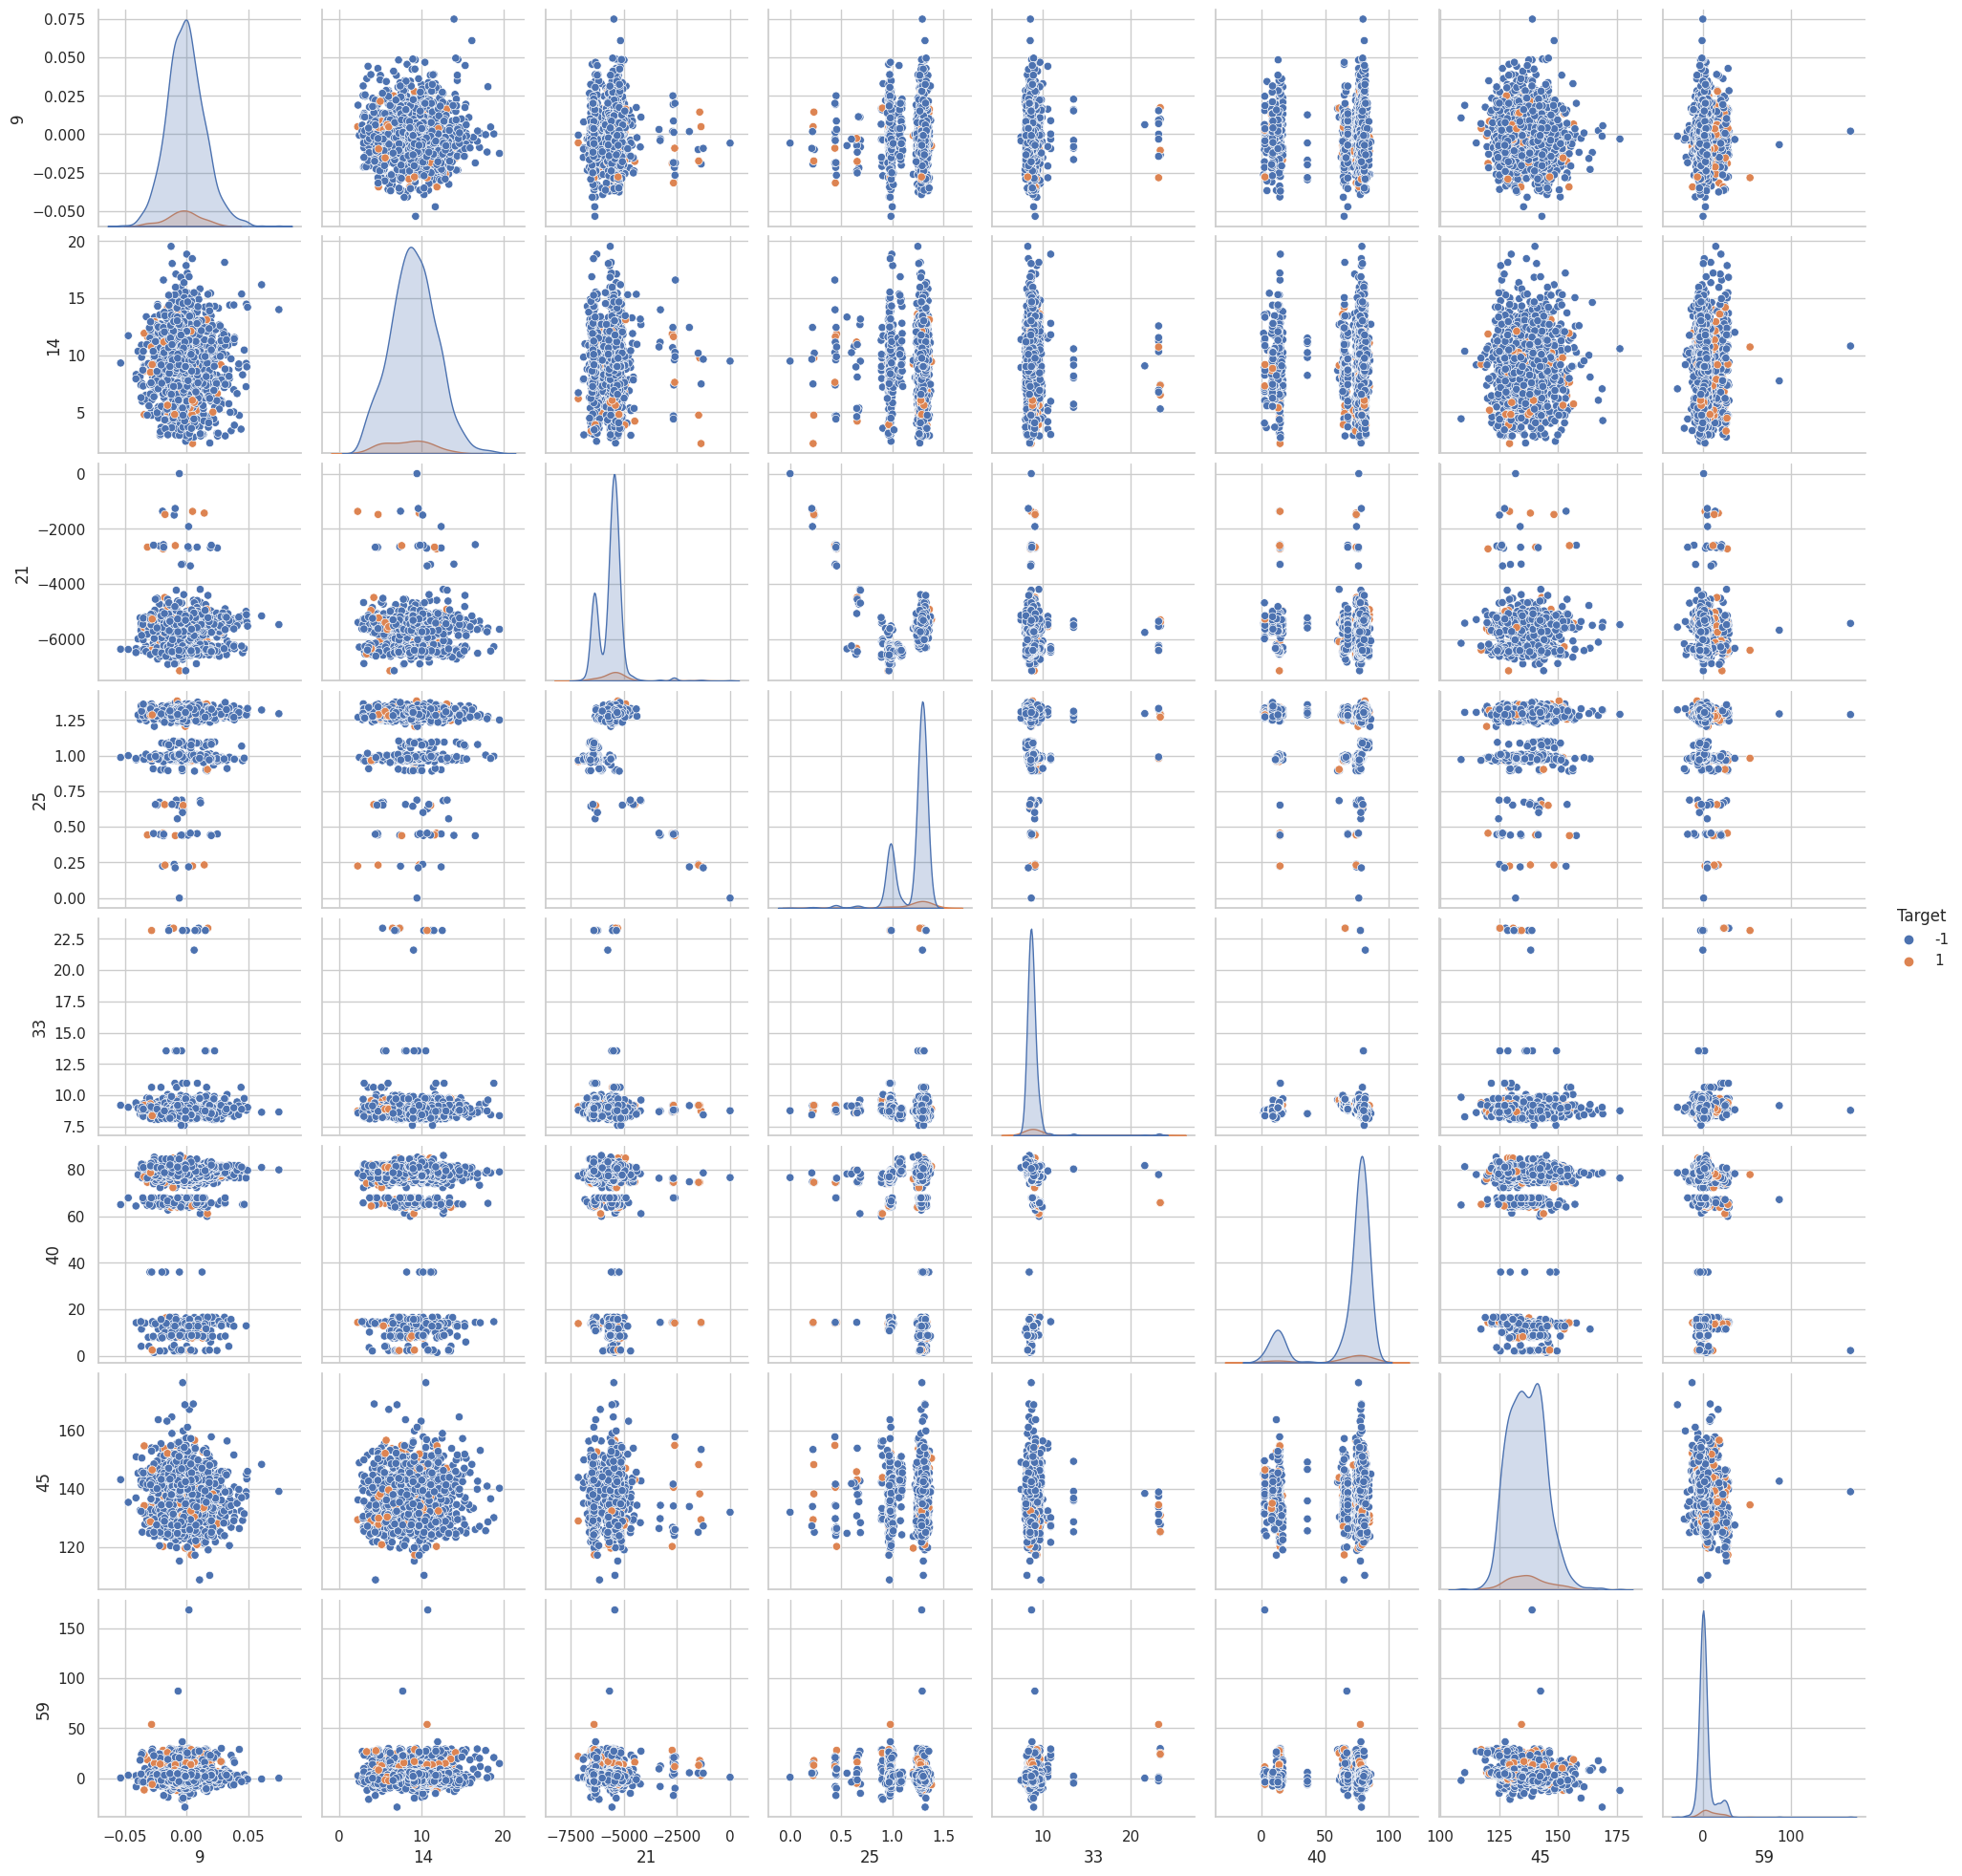

In [ ]:
# Include 'Target' column in the selected data if it exists
columns_of_interest = ['9', '14', '21', '25', '33', '40', '45', '59']

columns_to_plot = columns_of_interest + ['Target']

# Create pairplot for selected columns with 'Target' as hue
sns.pairplot(data=data[columns_to_plot], hue='Target')
plt.show()

* We check the paiplot between 8 randomly chosen features separated by the target column, to have an idea regarding the distribution of columns as well as whether there exists any clustering based on the target column.
* Based on the columns plotted, there seems to be no correlation among the observed features, suggesting absence of multicollinearity.
* The target column seems to be randomly distributed among the plotted features.
* Based on the kde, several plots indicate multiple peaks indicating presence of clusters such as columns 40, 21 and 25.
* The presence of clusters can also be observed from the scatterplots such as 40 and 45,25 and 50, etc.

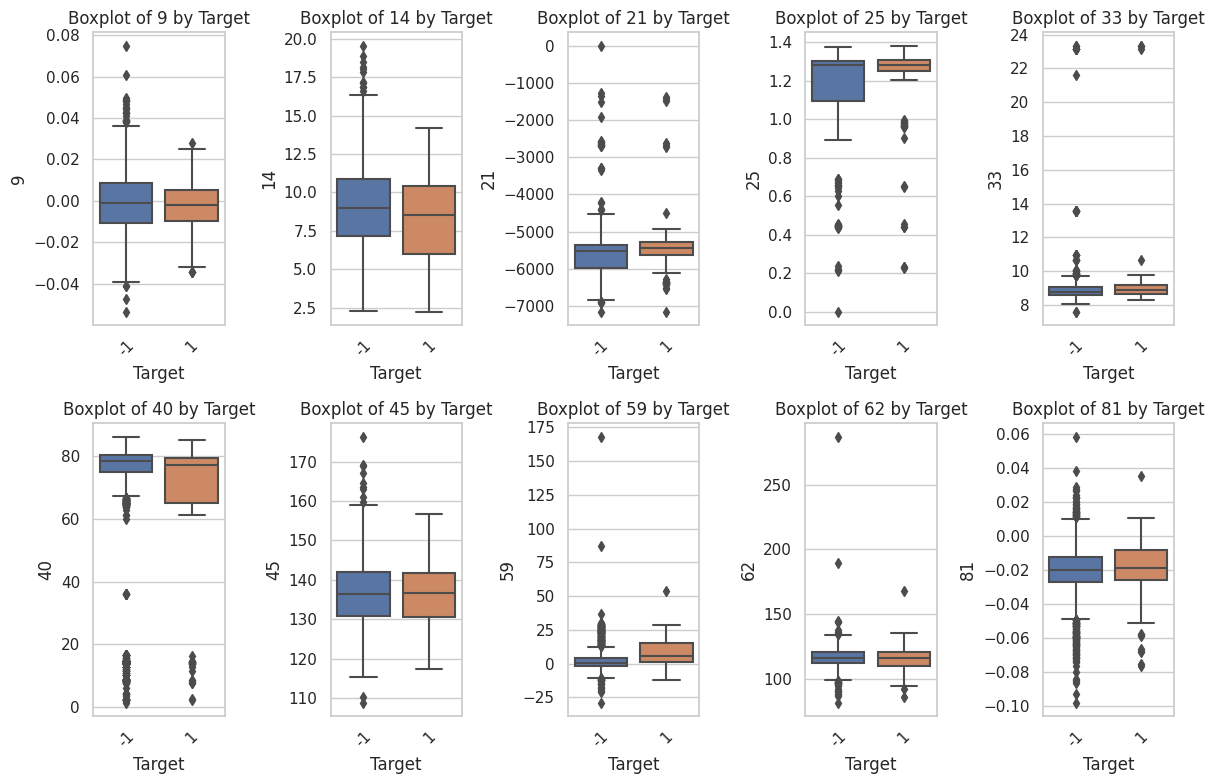

In [ ]:
# List of column names for which you want to create boxplots
columns_of_interest = ['9', '14', '21', '25', '33', '40', '45', '59', '62', '81']

# Create separate boxplots for each column based on 'Target'
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
for column in columns_of_interest:
    plt.subplot(2, 5, columns_of_interest.index(column) + 1)  # Creating subplots for each column
    sns.boxplot(x='Target', y=column, data=data)
    plt.title(f'Boxplot of {column} by Target')
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()
plt.show()

* We have plotted the boxplots for certain randomly selected columns separated by the target column to observed the distribution of the target features across the columns.
* The distribution of the target column is similar for both classes (-1 and 1) across most of the columns, with slight differences.

# **4. Data pre-processing:**


---



> ## **4.A. Segregate predictors vs target attributes.**


---


In [58]:
# Extracting independent features (X) and the target variable (y)
X = data.drop('Target', axis=1)  # X contains all columns except 'target_column'
y = data['Target']  # y contains only the 'target_column'

> ## **4.B. Check for target balancing and fix it if found imbalanced.**


---


In [59]:
y.value_counts()

-1    1463
 1     104
Name: Target, dtype: int64

In [60]:
y.value_counts(1)

-1    0.933631
 1    0.066369
Name: Target, dtype: float64

The data is heavily imbalanced with 93.3% -1 (pass) classes and 6.7% 1 (fail) classes.

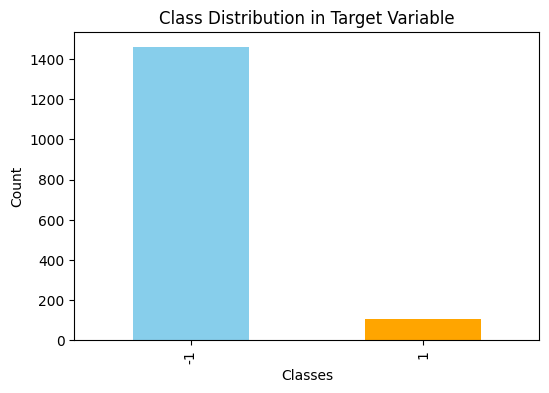

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution in Target Variable')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

We will do oversampling using SMOTE to treat class imbalance.

In [62]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

In [63]:
y_resampled.value_counts()

-1    1463
 1    1463
Name: Target, dtype: int64

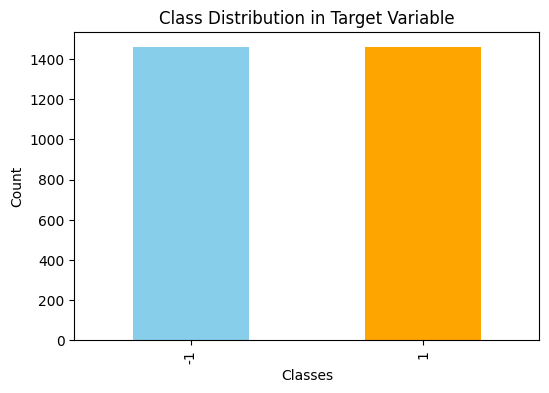

In [64]:
plt.figure(figsize=(6, 4))
y_resampled.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution in Target Variable')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

Now we have treated the class imbalance with equal representation of both classes in the target column.

> ## **4.C. Perform train-test split and standardise the data or vice versa if required.**


---


In [65]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [66]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> ## **4.D. Check if the train and test data have similar statistical characteristics when compared with original data.**


---


In [67]:
original_data_summary = data.describe()
original_data_summary

,9,14,21,25,33,40,45,59,62,81,98,102,103,104,126,129,130,134,142,145,155,180,183,210,227,311,312,324,352,355,368,376,390,405,407,411,416,419,424,432,433,437,443,474,480,485,487,488,500,550,563,575,588,Target
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,-0.000841,9.005371,-5618.393610,1.203845,8.960279,67.904909,136.743060,2.960241,116.502329,-0.021153,-0.018143,0.001115,-0.009789,-0.000015,2.750728,-0.554228,0.744976,39.391979,6.641565,0.063621,0.507171,19.013257,26.661170,0.088866,0.019125,0.097344,0.160051,13.332172,0.023356,0.034543,0.003172,0.001601,1.431868,0.024208,1.231997,2.616086,3.404349,309.061299,3.315469,99.367633,205.519304,4.016785,0.633941,37.637050,75.538131,201.111728,239.455326,352.616477,240.981377,17.013313,0.679641,0.104729,0.005283,-0.867262
std,0.015107,2.793916,626.421781,0.177487,1.344027,23.877841,7.846741,9.510891,8.612475,0.016890,0.426291,0.062847,0.003063,0.000850,0.252741,1.216967,0.082294,2.982828,3.536340,0.026524,1.118837,3.310575,6.833918,0.041741,0.010749,0.028787,0.117278,6.613737,0.013056,0.022135,0.002103,0.000534,20.326415,0.010701,0.363778,0.549004,1.032453,325.240503,6.319303,126.108109,225.634649,1.610244,0.143506,24.767377,35.683936,217.007760,261.808095,250.104924,322.797084,4.535925,0.110637,0.067791,0.002866,0.498010
min,-0.053400,2.249300,-7150.250000,0.000000,7.603200,1.434000,108.846400,-28.988200,81.490000,-0.098200,-5.271700,-0.535300,-0.032900,-0.011900,2.340000,-3.779000,0.419900,33.365800,1.740000,0.021400,0.140000,9.400000,5.014000,0.031900,0.006200,0.032800,0.022400,2.234500,0.005600,0.003800,0.000000,0.000400,0.304600,0.006200,0.424000,0.960900,0.000000,0.000000,0.486600,0.000000,0.000000,1.156800,0.216900,0.000000,8.840600,0.000000,0.000000,0.000000,0.000000,6.110000,0.304900,0.023000,0.001000,-1.000000
25%,-0.010800,7.096750,-5932.625000,1.094900,8.580000,74.240000,130.730450,-1.855450,112.055450,-0.027100,-0.217300,-0.035300,-0.011800,-0.000400,2.574000,-0.898800,0.688700,37.368900,5.110000,0.048050,0.240000,16.850000,21.172000,0.065900,0.013250,0.077600,0.091500,7.578800,0.016100,0.021400,0.002200,0.001300,0.675150,0.014100,0.966500,2.325300,2.667850,0.000000,1.965450,31.033850,10.047450,3.071700,0.550500,23.185450,52.971050,51.188500,57.316900,145.156850,0.000000,14.820000,0.567100,0.075100,0.003300,-1.000000
50%,-0.001300,8.973900,-5523.250000,1.283000,8.770000,78.270000,136.416400,0.973600,116.236400,-0.019900,0.000000,0.000000,-0.010100,0.000000,2.736000,-0.141900,0.758600,38.953800,6.270000,0.058600,0.320000,18.690000,27.197000,0.080300,0.016500,0.097700,0.121600,12.510900,0.022200,0.029700,0.002800,0.001600,0.877300,0.023900,1.237400,2.560500,3.234000,272.891600,2.668200,58.287600,151.168700,3.783800,0.643500,32.954900,70.693700,115.891900,114.596600,352.511400,0.000000,17.013313,0.679641,0.089500,0.004600,-1.000000
75%,0.008400,10.858700,-5356.625000,1.304300,9.060600,80.180000,142.090950,4.337700,120.918200,-0.012150,0.188650,0.033600,-0.008200,0.000400,2.873000,0.047300,0.814500,40.804600,7.500000,0.071800,0.460000,20.965000,31.687000,0.099050,0.021200,0.115900,0.160150,17.925150,0.026800,0.041900,0.003600,0.001900,1.148200,0.032300,1.416700,2.848450,4.010700,582.803100,3.469200,120.136900,304.541800,4.678250,0.733250,45.160350,92.911650,283.289000,391.277500,507.497050,505.225750,18.405000,0.738250,0.112150,0.006400,-1.000000
max,0.074900,19.546500,0.00

In [68]:
# Describe train data
train_data_summary = X_train.describe()
train_data_summary

,9,14,21,25,33,40,45,59,62,81,98,102,103,104,126,129,130,134,142,145,155,180,183,210,227,311,312,324,352,355,368,376,390,405,407,411,416,419,424,432,433,437,443,474,480,485,487,488,500,550,563,575,588
count,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000
mean,-0.002074,8.649438,-5504.795903,1.197033,9.222033,65.571980,136.506748,5.992323,115.811704,-0.020785,-0.042426,-0.002677,-0.008978,-0.000087,2.780567,-0.347242,0.754697,39.169391,6.547702,0.060927,0.462613,18.500716,27.462073,0.095607,0.019922,0.096391,0.157139,13.768466,0.022658,0.034276,0.003261,0.001643,1.258389,0.023474,1.234924,2.667653,3.328570,305.300481,3.045087,97.846121,212.580488,4.184474,0.642535,37.884066,75.898080,178.926924,220.856921,338.800299,235.372980,17.326373,0.678732,0.099036,0.005457
std,0.013430,2.615669,770.595400,0.207088,1.803867,22.725204,7.208765,9.866107,8.633390,0.015458,0.358241,0.060854,0.002998,0.000964,0.244836,1.013958,0.070641,2.637299,2.219569,0.022160,0.848803,2.903061,6.149526,0.048625,0.010436,0.026795,0.107338,6.071405,0.010242,0.017955,0.001948,0.000541,16.633857,0.010088,0.328044,0.514239,0.877216,309.641363,4.575199,111.915579,216.387661,2.138058,0.126675,23.123089,33.042945,191.546641,242.977778,239.893221,322.582519,5.281159,0.092199,0.052890,0.002581
min,-0.041000,2.249300,-7148.000000,0.000000,7.603200,1.434000,108.846400,-28.988200,81.490000,-0.093000,-5.271700,-0.535300,-0.032900,-0.011900,2.340000,-3.779000,0.419900,33.365800,1.740000,0.022300,0.140000,9.400000,5.014000,0.031900,0.006400,0.032800,0.022400,2.234500,0.005700,0.003800,0.000000,0.000400,0.304600,0.006200,0.424000,0.960900,0.000000,0.000000,0.486600,0.000000,0.000000,1.156800,0.216900,0.000000,8.840600,0.000000,0.000000,0.000000,0.000000,6.210000,0.304900,0.023000,0.001000
25%,-0.010496,6.817800,-5732.473127,1.243100,8.657695,65.010000,131.286663,-0.233200,111.432750,-0.026586,-0.216777,-0.038099,-0.011100,-0.000400,2.622000,-0.567700,0.709114,37.368900,5.209972,0.047256,0.260961,16.630000,22.719959,0.068200,0.014300,0.078358,0.094799,8.781664,0.016600,0.022597,0.002400,0.001300,0.712581,0.014300,1.014781,2.367849,2.689007,0.000000,2.027215,34.691366,20.953475,3.155900,0.574166,24.376349,54.090408,53.270900,71.751850,139.925725,0.000000,15.230263,0.610593,0.072590,0.003614
50%,-0.002053,8.592794,-5477.500000,1.283280,8.838400,77.195855,136.096626,3.262171,115.709591,-0.020200,-0.018143,-0.008296,-0.009164,0.000000,2.753000,-0.080150,0.764543,38.804154,6.340943,0.057431,0.352414,18.241382,28.777645,0.084169,0.017500,0.096606,0.120500,13.474743,0.022190,0.030471,0.002976,0.001600,0.883625,0.022700,1.231997,2.581627,3.180797,266.902866,2.707836,60.304950,157.264550,3.878640,0.649240,33.408950,70.937697,111.323917,111.557329,339.543955,0.000000,17.012639,0.679641,0.089300,0.004934
75%,0.005600,10.419672,-5320.432408,1.303022,9.161867,79.400484,141.351800,10.717019,120.145898,-0.012498,0.144825,0.025425,-0.006873,0.000391,2.881631,0.159822,0.811500,40.557000,7.430000,0.068859,0.490000,20.273641,31.798098,0.109055,0.021986,0.112900,0.159425,17.640684,0.026200,0.042198,0.003679,0.001900,1.112538,0.030900,1.402332,2.881400,3.842892,544.210627,3.403732,114.755287,308.361327,4.671186,0.732900,44.556270,94.140700,227.233724,309.519194,498.038872,478.414025,18.493318,0.715874,0.111483,0.006782
max,0.074900,19.546500,0.000000,1.382800,23.345300,86.120000,176.313600,168.145500,287.150900,0.03810

In [69]:
# Describe test data
test_data_summary = X_test.describe()
test_data_summary

,9,14,21,25,33,40,45,59,62,81,98,102,103,104,126,129,130,134,142,145,155,180,183,210,227,311,312,324,352,355,368,376,390,405,407,411,416,419,424,432,433,437,443,474,480,485,487,488,500,550,563,575,588
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,-0.001241,8.909023,-5439.888887,1.172708,9.168280,65.783425,137.004888,5.156604,115.980115,-0.020054,-0.003622,-0.005984,-0.008983,-0.000085,2.780237,-0.332948,0.760004,39.235273,6.686628,0.062452,0.458645,18.548971,27.226326,0.098464,0.020543,0.096871,0.152509,13.545481,0.023522,0.036928,0.003150,0.001619,0.918363,0.023787,1.231422,2.641075,3.295435,337.807870,3.171463,104.476581,214.889507,4.218581,0.648173,37.924761,75.001889,182.081636,238.338331,327.616762,264.278903,17.552037,0.678715,0.101405,0.005456
std,0.012930,2.543668,928.747634,0.244491,1.769561,23.143700,7.228223,9.007590,7.606746,0.017329,0.371341,0.063217,0.003244,0.001081,0.237127,1.026658,0.067795,2.594485,4.484510,0.019688,0.720021,3.038132,5.795545,0.053373,0.011581,0.026894,0.100644,6.100192,0.012464,0.023286,0.001985,0.000501,0.297367,0.010602,0.329064,0.522726,0.885590,305.973090,5.035902,116.240399,228.184391,2.602878,0.127553,20.581169,33.296092,198.439142,263.001541,253.795686,330.233216,6.231945,0.089669,0.060183,0.002905
min,-0.053400,2.309557,-7150.250000,0.225450,7.603200,2.126000,110.394500,-21.205500,88.439100,-0.098200,-1.225500,-0.474900,-0.017900,-0.011700,2.340000,-3.779000,0.419900,33.365800,1.990000,0.021400,0.170000,11.280000,13.393000,0.034771,0.006200,0.032800,0.031000,3.384900,0.005600,0.005500,0.000000,0.000500,0.315800,0.006200,0.538200,0.960900,0.000000,0.000000,0.758600,0.000000,0.000000,1.215700,0.216900,9.503500,14.445800,0.000000,0.000000,0.000000,0.000000,6.110000,0.348800,0.032700,0.001000
25%,-0.009573,7.008006,-5705.055979,1.010475,8.659811,64.872360,131.734427,-0.463425,111.887492,-0.025410,-0.215614,-0.043296,-0.011184,-0.000392,2.618654,-0.615000,0.714795,37.436427,5.140000,0.049609,0.260000,16.612825,22.978849,0.069939,0.014117,0.078101,0.092925,8.600062,0.016501,0.022921,0.002242,0.001300,0.711472,0.013900,1.008221,2.358365,2.636497,0.000000,2.028591,36.697130,17.976575,3.098893,0.574532,25.105925,53.368392,53.039035,68.391799,87.735025,0.000000,15.207053,0.600875,0.073012,0.003307
50%,-0.001800,8.865919,-5468.279986,1.281620,8.837133,77.630000,136.421846,2.748907,116.322750,-0.019268,-0.011272,-0.010061,-0.009215,0.000000,2.759751,-0.047364,0.769910,38.811958,6.250000,0.059554,0.355288,18.080550,28.095500,0.085786,0.017500,0.096700,0.121329,13.111252,0.022628,0.031750,0.002805,0.001590,0.890723,0.023188,1.247583,2.565405,3.134471,358.457255,2.705666,61.781250,158.641389,3.842250,0.655757,34.035000,69.697350,117.465849,115.891236,321.716209,0.000000,17.013313,0.679641,0.090600,0.005100
75%,0.006233,10.703752,-5327.047312,1.306021,9.129851,79.815000,142.122300,9.496737,120.389350,-0.010780,0.171580,0.023840,-0.007000,0.000400,2.884781,0.229805,0.814196,40.610793,7.692481,0.070696,0.480000,20.197907,31.741810,0.112350,0.022977,0.114663,0.160100,17.560746,0.027035,0.044075,0.003547,0.001900,1.094443,0.031745,1.388114,2.851687,3.843536,579.358672,3.300077,126.631003,314.350200,4.616819,0.734563,45.566425,93.982129,236.377117,345.367921,494.493100,539.641381,18.447500,0.728058,0.112014,0.006721
max,0.048900,18.038800,-1371.459478,1.374500,23.345300,84.980000,164.595500,52.498654,166.348641,0.058400,2.569800,0.256053,0.020300,0.005000,3.991000,2.

**Original Data:**
* The mean value for each feature varies, and the range of values is quite extensive.

**Train Data:**
* The mean and standard deviation of each feature in the training data are within a similar range as the original data, suggesting that the training data is representative.

**Test Data:**
* Similar to the training data, the mean and standard deviation of features in the test data are consistent with the original data.


Overall, the statistical characteristics (mean, standard deviation) of the train and test data appear to be similar, indicating that the data split for training and testing was done appropriately. This is essential for building a reliable machine learning model that generalizes well to unseen data.

# **5. Model training, testing and tuning:**


---



> ## **5.A. Use any Supervised Learning technique to train a model.**


---


In [70]:
X_train.shape

(2340, 53)

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the AdaBoost classifier with a decision tree as the base estimator
ada_boost = AdaBoostClassifier(random_state=42)

# Train the model using the training set
ada_boost.fit(X_train, y_train)

# Predict on the training set
train_predictions = ada_boost.predict(X_train)
test_predictions = ada_boost.predict(X_test)

# Calculate metrics for training set
accuracy_train = accuracy_score(y_train, train_predictions)
precision_train = precision_score(y_train, train_predictions)
recall_train = recall_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions)

# Calculate metrics for test set
accuracy_test = accuracy_score(y_test, test_predictions)
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions)

# Print metrics for training set
print("Metrics for training set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print("\nClassification Report for training set:")
print(classification_report(y_train, train_predictions))

# Print metrics for test set
print("\nMetrics for test set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print("\nClassification Report for test set:")
print(classification_report(y_test, test_predictions))

Metrics for training set:
Accuracy: 0.9325
Precision: 0.9238
Recall: 0.9427
F1 Score: 0.9332

Classification Report for training set:
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93      1170
           1       0.92      0.94      0.93      1170

    accuracy                           0.93      2340
   macro avg       0.93      0.93      0.93      2340
weighted avg       0.93      0.93      0.93      2340


Metrics for test set:
Accuracy: 0.8788
Precision: 0.8627
Recall: 0.9010
F1 Score: 0.8815

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.90      0.86      0.88       293
           1       0.86      0.90      0.88       293

    accuracy                           0.88       586
   macro avg       0.88      0.88      0.88       586
weighted avg       0.88      0.88      0.88       586



> ## **5.B. Use cross validation techniques.**


> ```
Hint: Use all CV techniques that you have learnt in the course.
```



---


In [ ]:
model=ada_boost

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import numpy as np

**K-Fold Cross validation**

In [ ]:
# Create the KFold object
k_fold = KFold(n_splits=20)  # You can change n_splits as needed

# Perform K-Fold Cross-Validation
scores_kfold = cross_val_score(model, X_train, y_train, cv=k_fold)
mean_score_kfold = scores_kfold.mean()

print(f"Mean accuracy using K-Fold Cross-Validation: {mean_score_kfold:.4f}")

Mean accuracy using K-Fold Cross-Validation: 0.8996


In [ ]:
scores_kfold

array([0.88034188, 0.91452991, 0.91452991, 0.88034188, 0.93162393,
       0.90598291, 0.90598291, 0.88888889, 0.86324786, 0.90598291,
       0.88034188, 0.94871795, 0.92307692, 0.90598291, 0.94871795,
       0.90598291, 0.85470085, 0.87179487, 0.84615385, 0.91452991])

In [ ]:
std_score_kfold = np.std(scores_kfold)
print(f"Standard deviation using kfold : {std_score_kfold:.4f}")

Standard deviation using kfold : 0.0278


**Leave One Out Cross Validation (LOOCV)**

In [ ]:
# Create the LOOCV object
loocv = LeaveOneOut()

# Perform LOOCV
scores_loocv = cross_val_score(model, X_train, y_train, cv=loocv)
mean_score_loocv = scores_loocv.mean()

print(f"Mean accuracy using Leave-One-Out Cross-Validation: {mean_score_loocv:.4f}")

Mean accuracy using Leave-One-Out Cross-Validation: 0.8996


In [ ]:
scores_loocv

array([1., 1., 1., ..., 0., 1., 1.])

In [ ]:
std_score_loocv = np.std(scores_loocv)
print(f"Standard deviation using LOOCV : {std_score_loocv:.4f}")

Standard deviation using LOOCV : 0.3006


**Bootstrap Sampling Cross Validation**

In [ ]:
from sklearn.utils import resample

# Number of bootstrap samples
n_iterations = 100

scores_bootstrap = []
for _ in range(n_iterations):
    X_bootstrap, y_bootstrap = resample(X_train, y_train)
    model.fit(X_bootstrap, y_bootstrap)
    score = model.score(X_bootstrap, y_bootstrap)
    scores_bootstrap.append(score)

mean_score_bootstrap = np.mean(scores_bootstrap)
print(f"Mean accuracy using Bootstrap Sampling: {mean_score_bootstrap:.4f}")

Mean accuracy using Bootstrap Sampling: 0.9503


In [ ]:
scores_bootstrap

[0.9465811965811965,
 0.9444444444444444,
 0.9623931623931624,
 0.9457264957264957,
 0.9388888888888889,
 0.9444444444444444,
 0.9393162393162393,
 0.9504273504273504,
 0.9427350427350427,
 0.9504273504273504,
 0.9598290598290599,
 0.9521367521367521,
 0.9568376068376069,
 0.9393162393162393,
 0.9474358974358974,
 0.9474358974358974,
 0.9423076923076923,
 0.9478632478632478,
 0.95,
 0.9508547008547008,
 0.9461538461538461,
 0.9585470085470086,
 0.9444444444444444,
 0.9547008547008548,
 0.9529914529914529,
 0.9474358974358974,
 0.9465811965811965,
 0.9572649572649573,
 0.9508547008547008,
 0.9457264957264957,
 0.9547008547008548,
 0.9521367521367521,
 0.947008547008547,
 0.9542735042735043,
 0.9465811965811965,
 0.955982905982906,
 0.9444444444444444,
 0.9491452991452991,
 0.9529914529914529,
 0.9632478632478633,
 0.9504273504273504,
 0.9448717948717948,
 0.9388888888888889,
 0.9551282051282052,
 0.9551282051282052,
 0.9457264957264957,
 0.9452991452991453,
 0.958974358974359,
 0.950427

In [ ]:
std_score_bootstrap = np.std(scores_bootstrap)
print(f"Standard deviation using Bootstrap Sampling: {std_score_bootstrap:.4f}")

Standard deviation using Bootstrap Sampling: 0.0057


In [ ]:
# Store the results in a DataFrame
results_df = pd.DataFrame({
    'Model_Name': ['Default Adaboost'],
    'Train_Accuracy': [accuracy_train],
    'Test_Accuracy': [accuracy_test],
    'K-Fold score': [mean_score_kfold],
     #'LOOCV score': [mean_score_loocv],
     #'Bootstrap score': [mean_score_bootstrap]
})

# Display the DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.87884,0.899573


> ## **5.C. Apply hyper-parameter tuning techniques to get the best accuracy.**


> ```
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
```




---


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Define the AdaBoost classifier
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

# Define different base estimators
base_estimators = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(max_depth=3),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
]

# Define a parameter grid
param_grid = {
    'estimator': base_estimators,
    'n_estimators': randint(50, 200),  # Number of estimators (trees) in the ensemble
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=ada_boost, param_distributions=param_grid, n_iter=20, cv=5, verbose=3, scoring='accuracy', random_state=42)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END estimator=DecisionTreeClassifier(max_depth=5), learning_rate=1.0, n_estimators=142;, score=0.976 total time=  10.2s
[CV 2/5] END estimator=DecisionTreeClassifier(max_depth=5), learning_rate=1.0, n_estimators=142;, score=0.989 total time=   9.9s
[CV 3/5] END estimator=DecisionTreeClassifier(max_depth=5), learning_rate=1.0, n_estimators=142;, score=0.991 total time=   8.5s
[CV 4/5] END estimator=DecisionTreeClassifier(max_depth=5), learning_rate=1.0, n_estimators=142;, score=0.987 total time=  10.0s
[CV 5/5] END estimator=DecisionTreeClassifier(max_depth=5), learning_rate=1.0, n_estimators=142;, score=0.983 total time=   8.9s
[CV 1/5] END estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=121;, score=0.970 total time=   8.3s
[CV 2/5] END estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=121;, score=0.987 total time=   7.9s
[CV 3/5] END estimator=DecisionTree

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the AdaBoost classifier with a decision tree as the base estimator
ada_boost = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=5), learning_rate = 1.0, n_estimators = 142, random_state=42)

# Train the model using the training set
ada_boost.fit(X_train, y_train)

# Predict on the training set
train_predictions = ada_boost.predict(X_train)
test_predictions = ada_boost.predict(X_test)

# Calculate metrics for training set
accuracy_train = accuracy_score(y_train, train_predictions)
precision_train = precision_score(y_train, train_predictions)
recall_train = recall_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions)

# Calculate metrics for test set
accuracy_test = accuracy_score(y_test, test_predictions)
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions)

# Print metrics for training set
print("Metrics for training set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print("\nClassification Report for training set:")
print(classification_report(y_train, train_predictions))

# Print metrics for test set
print("\nMetrics for test set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print("\nClassification Report for test set:")
print(classification_report(y_test, test_predictions))

Metrics for training set:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report for training set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1170
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340


Metrics for test set:
Accuracy: 0.9966
Precision: 0.9932
Recall: 1.0000
F1 Score: 0.9966

Classification Report for test set:
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       293
           1       0.99      1.00      1.00       293

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



> ## **5.D. Use any other technique/method which can enhance the model performance.**


> ```
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
```



---


In [73]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA with n components
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

In [74]:
covMatrix = np.cov(X_train, rowvar=False)
covMatrix

array([[ 1.80354519e-04, -6.28242863e-04, -3.36230085e-01, ...,
         8.42416212e-06,  3.06051766e-05,  6.86843965e-07],
       [-6.28242863e-04,  6.84172628e+00, -2.40216580e+02, ...,
         5.34034260e-03,  3.66405503e-03,  1.29482266e-05],
       [-3.36230085e-01, -2.40216580e+02,  5.93817271e+05, ...,
         1.41051316e+00,  1.25645213e+00,  2.00537515e-01],
       ...,
       [ 8.42416212e-06,  5.34034260e-03,  1.41051316e+00, ...,
         8.50062181e-03,  2.30098322e-04,  2.65992795e-05],
       [ 3.06051766e-05,  3.66405503e-03,  1.25645213e+00, ...,
         2.30098322e-04,  2.79734674e-03, -5.99518330e-06],
       [ 6.86843965e-07,  1.29482266e-05,  2.00537515e-01, ...,
         2.65992795e-05, -5.99518330e-06,  6.65992097e-06]])

In [75]:
# Explained variance ratio
pca.explained_variance_ratio_

array([5.93995088e-01, 1.04748766e-01, 9.59911257e-02, 6.03711615e-02,
       5.67272565e-02, 3.96140032e-02, 3.43381108e-02, 1.15122975e-02,
       1.07727695e-03, 5.59914387e-04, 4.56999551e-04, 2.72293605e-04,
       9.50816848e-05, 7.63066231e-05, 3.61703057e-05, 3.58125117e-05,
       2.56619024e-05, 2.00752964e-05, 1.23668934e-05, 7.30447883e-06,
       6.57497517e-06, 6.07438151e-06, 4.36906404e-06, 4.26094333e-06,
       2.75045547e-06, 8.88066917e-07, 7.68594244e-07, 6.84849078e-07,
       2.12046049e-07, 1.18699168e-07, 9.75060366e-08, 5.45022845e-08,
       2.75320192e-08, 1.39388428e-08, 9.35938713e-09, 7.89109006e-09,
       3.81238827e-09, 3.23684047e-09, 2.54216602e-09, 1.98634276e-09,
       5.28739543e-10, 4.54296813e-10, 2.95813513e-10, 2.07565629e-10,
       1.65980939e-10, 9.49510643e-11, 8.77591465e-11, 6.79380958e-11,
       6.08713202e-12, 4.78350822e-12, 2.00062601e-12, 6.83393071e-13,
       2.62774090e-13])

In [76]:
#eigen vectors
pca.components_

array([[-5.46950240e-07, -3.98618254e-04,  9.94909472e-01, ...,
         1.99431000e-06,  2.12359004e-06,  3.30485044e-07],
       [-1.89792425e-06,  6.81057652e-04, -2.75083938e-02, ...,
        -5.81638354e-06, -1.31350882e-05, -2.12370280e-07],
       [ 1.86527488e-06,  3.44460508e-04, -1.19054903e-03, ...,
         3.48744259e-07,  9.30952464e-06,  2.80475981e-07],
       ...,
       [ 5.04814533e-03, -1.14341381e-05,  1.55262024e-07, ...,
         9.92921787e-04, -7.64146294e-04, -3.72701792e-03],
       [-6.19861418e-04, -2.49885892e-05, -7.25041188e-08, ...,
        -2.22303154e-04, -7.07924206e-04,  4.40249875e-03],
       [-2.56428608e-03,  1.26541681e-05, -1.47594147e-08, ...,
        -1.09801414e-04,  8.83956152e-04,  1.12134361e-02]])

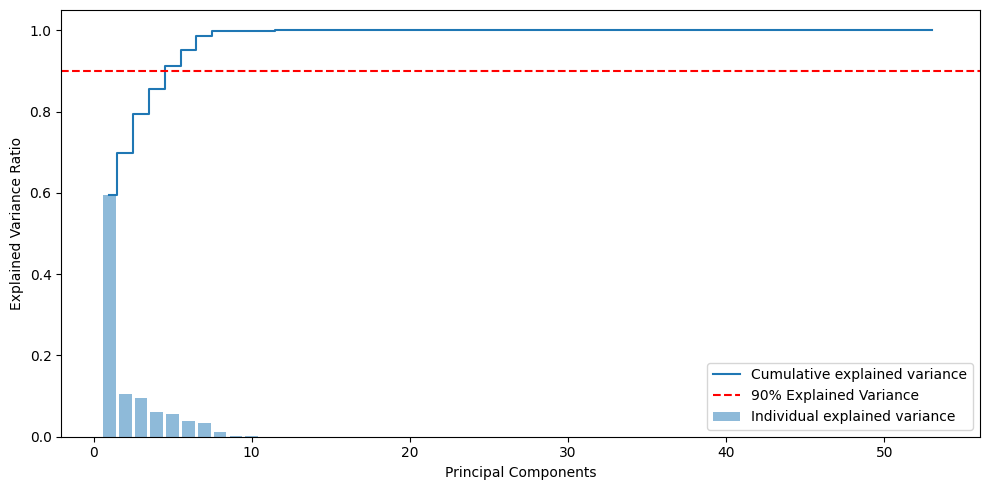

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting variance explained by the principal components and the cumulative variance explained
plt.figure(figsize=(10, 5))

# Plotting individual explained variance
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')

# Plotting cumulative explained variance
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')

# Plotting horizontal line for 90% explained variance
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [78]:
# Create a DataFrame to store components and explained variance ratio
components_df = pd.DataFrame({
    'Component': range(1, len(pca.explained_variance_ratio_) + 1),
    'Explained_Variance_Ratio': pca.explained_variance_ratio_,
    'Cumulative_Explained_Variance': cumulative_explained_variance
})

# Display the table
components_df

,Component,Explained_Variance_Ratio,Cumulative_Explained_Variance
0,1,5.939951e-01,0.593995
1,2,1.047488e-01,0.698744
2,3,9.599113e-02,0.794735
3,4,6.037116e-02,0.855106
4,5,5.672726e-02,0.911833
5,6,3.961400e-02,0.951447
6,7,3.433811e-02,0.985786
7,8,1.151230e-02,0.997298
8,9,1.077277e-03,0.998375
9,10,5.599144e-04,0.998935


Based on the table, 5 components can explain more than 90% of the variance, 6 components can explain more than 95% of the variance and 8 components can explain over 99% variance.
So, we will use 5 principal components to train the data, as it catures enough information.

In [79]:
pca5 = PCA(n_components=5)
pca5.fit(X_train)

PCA(n_components=5)

In [80]:
pca5.components_

array([[-5.46950240e-07, -3.98618254e-04,  9.94909472e-01,
        -9.20144733e-05, -6.17449784e-05, -3.43412383e-03,
         5.88346252e-04,  1.73058222e-05, -8.44034326e-04,
         1.16330929e-06, -2.71595375e-05, -3.43420348e-06,
         4.44410398e-07,  3.07288949e-08,  8.39845615e-06,
        -2.71879035e-05,  4.59133855e-06,  2.98442791e-04,
         4.62726308e-04, -4.27204393e-07, -1.43307760e-05,
        -1.87349405e-04, -5.43884027e-04,  1.56391211e-07,
        -9.71927854e-07, -4.44321597e-06,  3.49107790e-05,
        -2.85601276e-04, -1.21464173e-06, -7.22595992e-07,
        -2.89171930e-07,  2.41180299e-08,  1.14712879e-04,
        -1.26122546e-06, -1.82548504e-05,  3.43767026e-05,
         3.82989584e-05,  8.51872758e-03,  1.49616560e-05,
         3.73473777e-02,  8.87545608e-02, -2.09781403e-04,
         2.03927886e-06, -1.77735097e-03, -1.36520691e-03,
        -1.02999877e-02,  2.02092866e-02, -5.31460440e-04,
         1.66339876e-02,  2.68759097e-04,  1.99431000e-0

In [81]:
pca5.explained_variance_ratio_

array([0.59399509, 0.10474877, 0.09599113, 0.06037116, 0.05672726])

* We have performed PCA on the data for dimensionality reduction and have reduced the dimensionality from 53 to 5, such that the selected dimensions explains more than 90% of the varaince in the data.
* Other steps such as attribute removal, standardisation/normalisation, target balancing etc have already been performed in the previous step.

> ## **5.E. Display and explain the classification report in detail.**


---


In [82]:
X_train_pca5 = pca.fit_transform(X_train)

In [83]:
X_test_pca5 = pca.transform(X_test)

Metrics for training set:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report for training set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1170
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340


Metrics for test set:
Accuracy: 0.9983
Precision: 0.9966
Recall: 1.0000
F1 Score: 0.9983

Classification Report for test set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       293

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



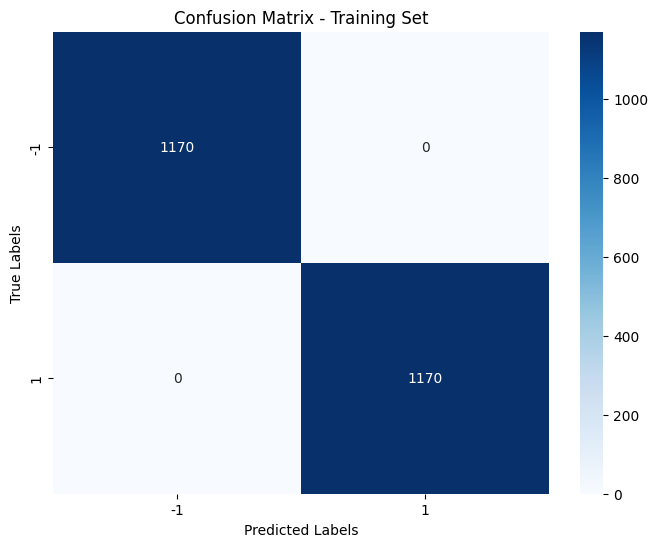

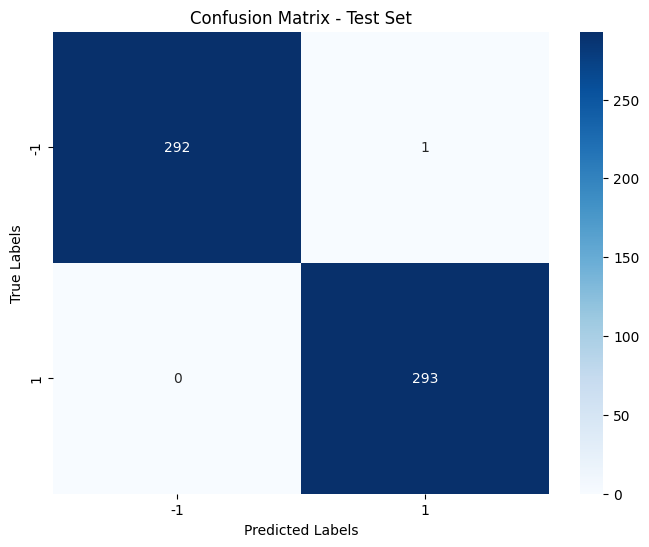

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the AdaBoost classifier with a decision tree as the base estimator
ada_boost = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=5), learning_rate = 1.0, n_estimators = 142, random_state=42)

# Train the model using the training set
ada_boost.fit(X_train_pca5, y_train)

# Predict on the training set
train_predictions = ada_boost.predict(X_train_pca5)
test_predictions = ada_boost.predict(X_test_pca5)

# Calculate metrics for training set
accuracy_train = accuracy_score(y_train, train_predictions)
precision_train = precision_score(y_train, train_predictions)
recall_train = recall_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions)

# Calculate metrics for test set
accuracy_test = accuracy_score(y_test, test_predictions)
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions)

# Print metrics for training set
print("Metrics for training set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print("\nClassification Report for training set:")
print(classification_report(y_train, train_predictions))

# Print metrics for test set
print("\nMetrics for test set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print("\nClassification Report for test set:")
print(classification_report(y_test, test_predictions))

# Confusion Matrix for Training Set
conf_matrix_train = confusion_matrix(y_train, train_predictions)

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, test_predictions)

# Plot Confusion Matrix Heatmap for Training Set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot Confusion Matrix Heatmap for Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
model=ada_boost

In [ ]:
# Create the KFold object
k_fold = KFold(n_splits=20)

# Perform K-Fold Cross-Validation
scores_kfold = cross_val_score(model, X_train_pca5, y_train, cv=k_fold)
mean_score_kfold = scores_kfold.mean()

print(f"Mean accuracy using K-Fold Cross-Validation: {mean_score_kfold:.4f}")

Mean accuracy using K-Fold Cross-Validation: 0.9893


In [ ]:
updated_results_df = pd.DataFrame({
    'Model_Name': ['Best Adaboost (PCA-5 components)'],
    'Train_Accuracy': [accuracy_train],
    'Test_Accuracy': [accuracy_test],
    'K-Fold score': [mean_score_kfold],
    #'LOOCV score': [mean_score_loocv],
    #'Bootstrap score': [mean_score_bootstrap]
})

# Concatenate the DataFrames
results_df = pd.concat([results_df, updated_results_df], ignore_index=True)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316


* The Adaboost model after hyperparameter tuning and PCA gives 100% accuracy on the train data and almost 100% accuracy on the test data.
* It also has 100% recall and precision on the train data and almost 100% precision and recall for the test class.
* Moreover the confusion matrix indicates that in the training set, there are zero false positives and false negatives, and the model predicts all the train data correctly.
* On the other hand, for the test data, it predicts all the 1(fail) class of the target column correctly, and only 1 value of the -1(pass) class of the target column incorrectly.
* The cross validation score indicated a mean accuracy of 98%.
* Such model with 100% accuracy is likely to be prone to overfitting, as achieving 100% accuracy in the real world is improbable.
* Comparing with the default adaboost model, the default adaboost model has a lower train accuracy of 93% and test accuarcy of 87% and a cross validation score of 89%.
* This model has a decent accuracy score (though low). Also the difference between train and test performance is also approximately 5% which is quite a low.
* This indicates a stable model with a good bias variance tradeoff which is less prone to overfitting.
* Thus, though the hypertuned model has very good accuracy scores, we will still prefer the default adaboost model, given that we do not have much information regarding the domain, the individual columns,etc regarding the dataset.

> ## **5.F. Apply the above steps for all possible models that you have learnt so far.**


---


We define a set of functions to apply all the above steps such as training the models, performing hyper-parameter tuning, performing PCA, displaying the classification reports and storing them for various supervized learning models.

In [ ]:
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def evaluate_model(model):
    # Train the model using the training set
    model.fit(X_train, y_train)

    # Predict on the training set
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate metrics for training and test set
    accuracy_train = accuracy_score(y_train, train_predictions)
    accuracy_test = accuracy_score(y_test, test_predictions)

    # Print metrics for training set
    print("Metrics for training set:")
    print(f"Accuracy: {accuracy_train:.4f}")
    print("\nClassification Report for training set:")
    print(classification_report(y_train, train_predictions))

    # Print metrics for test set
    print("\nMetrics for test set:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print("\nClassification Report for test set:")
    print(classification_report(y_test, test_predictions))
    return accuracy_train, accuracy_test

In [ ]:
def update_results_df(model_name, results_df):
    # Create a DataFrame for the updated model results
    updated_results_df = pd.DataFrame({
        'Model_Name': [model_name],
        'Train_Accuracy': [accuracy_train],
        'Test_Accuracy': [accuracy_test],
        'K-Fold score': [mean_score_kfold],
        #'LOOCV score': [mean_score_loocv],
        #'Bootstrap score': [mean_score_bootstrap]
    })

    # Concatenate the DataFrames
    results_df = pd.concat([results_df, updated_results_df], ignore_index=True)
    return results_df

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

def perform_kfold_cross_validation(model_name, X_train, y_train, n_splits=20):
    # Create the KFold object
    k_fold = KFold(n_splits=n_splits)

    # Perform K-Fold Cross-Validation
    scores_kfold = cross_val_score(model, X_train, y_train, cv=k_fold)
    mean_score_kfold = scores_kfold.mean()

    print(f"Mean accuracy using K-Fold Cross-Validation: {mean_score_kfold:.4f}")

    return mean_score_kfold

In [ ]:
def get_best_parameters(random_search):

    random_search.fit(X_train, y_train)

    # Get the best parameters and the best score
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Score (Accuracy):", best_score)

In [ ]:
def evaluate_model_with_PCA5(model):
    # Train the model using the training set
    model.fit(X_train_pca5, y_train)

    # Predict on the training set
    train_predictions = model.predict(X_train_pca5)
    test_predictions = model.predict(X_test_pca5)

    # Calculate metrics for training and test set
    accuracy_train = accuracy_score(y_train, train_predictions)
    accuracy_test = accuracy_score(y_test, test_predictions)

    # Print metrics for training set
    print("Metrics for training set:")
    print(f"Accuracy: {accuracy_train:.4f}")
    print("\nClassification Report for training set:")
    print(classification_report(y_train, train_predictions))

    # Print metrics for test set
    print("\nMetrics for test set:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print("\nClassification Report for test set:")
    print(classification_report(y_test, test_predictions))
    return accuracy_train, accuracy_test

> ### **Logistic regression**


---


In [ ]:
import warnings

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [ ]:
# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

accuracy_train, accuracy_test=evaluate_model(model)

Metrics for training set:
Accuracy: 0.7457

Classification Report for training set:
              precision    recall  f1-score   support

          -1       0.74      0.76      0.75      1170
           1       0.75      0.73      0.74      1170

    accuracy                           0.75      2340
   macro avg       0.75      0.75      0.75      2340
weighted avg       0.75      0.75      0.75      2340


Metrics for test set:
Accuracy: 0.7355

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.72      0.77      0.75       293
           1       0.76      0.70      0.72       293

    accuracy                           0.74       586
   macro avg       0.74      0.74      0.74       586
weighted avg       0.74      0.74      0.74       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.7385


In [ ]:
# Update the results DataFrame using the function
model_name = 'Default Logistic Regression'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462


In [ ]:
# Define Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty norm
    'solver': ['liblinear', 'saga'],  # Solver type
    'max_iter': randint(100, 100000)
}

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_grid, n_iter=20,
                                   scoring='accuracy', cv=5, random_state=42, verbose =3)

get_best_parameters(random_search)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=1, max_iter=960, penalty=l1, solver=liblinear;, score=0.812 total time=   1.9s
[CV 2/5] END C=1, max_iter=960, penalty=l1, solver=liblinear;, score=0.840 total time=   2.6s
[CV 3/5] END C=1, max_iter=960, penalty=l1, solver=liblinear;, score=0.803 total time=   2.1s
[CV 4/5] END C=1, max_iter=960, penalty=l1, solver=liblinear;, score=0.825 total time=   1.8s
[CV 5/5] END C=1, max_iter=960, penalty=l1, solver=liblinear;, score=0.814 total time=   1.9s
[CV 1/5] END C=10, max_iter=76920, penalty=l1, solver=saga;, score=0.741 total time=  11.1s
[CV 2/5] END C=10, max_iter=76920, penalty=l1, solver=saga;, score=0.767 total time=  12.3s
[CV 3/5] END C=10, max_iter=76920, penalty=l1, solver=saga;, score=0.737 total time=   9.9s
[CV 4/5] END C=10, max_iter=76920, penalty=l1, solver=saga;, score=0.759 total time=  10.5s
[CV 5/5] END C=10, max_iter=76920, penalty=l1, solver=saga;, score=0.759 total time=  10.8s
[CV 1/5]

In [ ]:
# Initialize Logistic Regression model
model = LogisticRegression(C = 100, max_iter = 72032, penalty = 'l2', solver = 'liblinear', random_state=42)

accuracy_train, accuracy_test = evaluate_model_with_PCA5(model)

Metrics for training set:
Accuracy: 0.8397

Classification Report for training set:
              precision    recall  f1-score   support

          -1       0.86      0.81      0.84      1170
           1       0.82      0.87      0.84      1170

    accuracy                           0.84      2340
   macro avg       0.84      0.84      0.84      2340
weighted avg       0.84      0.84      0.84      2340


Metrics for test set:
Accuracy: 0.8311

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.83      0.83      0.83       293
           1       0.83      0.83      0.83       293

    accuracy                           0.83       586
   macro avg       0.83      0.83      0.83       586
weighted avg       0.83      0.83      0.83       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train_pca5, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.8235


In [ ]:
# Update the results DataFrame using the function
model_name = 'Best Logistic Regression (with PCA)'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504


> ### **K Nearest Neighbour**


In [ ]:
# Initialize KNN model
model = KNeighborsClassifier()

accuracy_train, accuracy_test=evaluate_model(model)

Metrics for training set:
Accuracy: 0.8825

Classification Report for training set:
              precision    recall  f1-score   support

          -1       1.00      0.77      0.87      1170
           1       0.81      1.00      0.89      1170

    accuracy                           0.88      2340
   macro avg       0.90      0.88      0.88      2340
weighted avg       0.90      0.88      0.88      2340


Metrics for test set:
Accuracy: 0.8549

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.98      0.72      0.83       293
           1       0.78      0.99      0.87       293

    accuracy                           0.85       586
   macro avg       0.88      0.85      0.85       586
weighted avg       0.88      0.85      0.85       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.8248


In [ ]:
# Update the results DataFrame using the function
model_name = 'Default KNN'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786


In [ ]:
# Define KNN model
knn = KNeighborsClassifier()


# Define hyperparameters for Randomized Search
param_grid = {
    'n_neighbors': np.arange(3, 50, 2),  # Only odd numbers for the number of neighbors
    'p':  randint(1, 5),  # Power parameter for the Minkowski distance
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
}

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, n_iter=20,
                                   scoring='accuracy', cv=5, random_state=42, verbose=3)

get_best_parameters(random_search)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END n_neighbors=15, p=4, weights=uniform;, score=0.707 total time=   1.0s
[CV 2/5] END n_neighbors=15, p=4, weights=uniform;, score=0.720 total time=   1.0s
[CV 3/5] END n_neighbors=15, p=4, weights=uniform;, score=0.735 total time=   1.0s
[CV 4/5] END n_neighbors=15, p=4, weights=uniform;, score=0.786 total time=   1.0s
[CV 5/5] END n_neighbors=15, p=4, weights=uniform;, score=0.731 total time=   1.0s
[CV 1/5] END n_neighbors=31, p=3, weights=distance;, score=0.720 total time=   1.0s
[CV 2/5] END n_neighbors=31, p=3, weights=distance;, score=0.712 total time=   1.0s
[CV 3/5] END n_neighbors=31, p=3, weights=distance;, score=0.720 total time=   1.0s
[CV 4/5] END n_neighbors=31, p=3, weights=distance;, score=0.771 total time=   1.1s
[CV 5/5] END n_neighbors=31, p=3, weights=distance;, score=0.735 total time=   1.7s
[CV 1/5] END n_neighbors=43, p=3, weights=distance;, score=0.720 total time=   1.6s
[CV 2/5] END n_neig

In [ ]:
# Initialize KNN model
model = KNeighborsClassifier(n_neighbors = 5, p = 4, weights = 'distance')  # You can set the appropriate number of neighbors

accuracy_train, accuracy_test = evaluate_model_with_PCA5(model)

Metrics for training set:
Accuracy: 1.0000

Classification Report for training set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1170
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340


Metrics for test set:
Accuracy: 0.8618

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.99      0.73      0.84       293
           1       0.79      0.99      0.88       293

    accuracy                           0.86       586
   macro avg       0.89      0.86      0.86       586
weighted avg       0.89      0.86      0.86       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train_pca5, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.8218


In [ ]:
# Update the results DataFrame using the function
model_name = 'Best KNN (with PCA)'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795


> ### **Gaussian Naive Bayes**


In [ ]:
# Initialize gausssian NB model
model = GaussianNB()

accuracy_train, accuracy_test=evaluate_model(model)

Metrics for training set:
Accuracy: 0.6838

Classification Report for training set:
              precision    recall  f1-score   support

          -1       0.98      0.38      0.54      1170
           1       0.61      0.99      0.76      1170

    accuracy                           0.68      2340
   macro avg       0.79      0.68      0.65      2340
weighted avg       0.79      0.68      0.65      2340


Metrics for test set:
Accuracy: 0.6826

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.93      0.39      0.55       293
           1       0.62      0.97      0.75       293

    accuracy                           0.68       586
   macro avg       0.78      0.68      0.65       586
weighted avg       0.78      0.68      0.65       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.6859


In [ ]:
# Update the results DataFrame using the function
model_name = 'Default Gaussian NB'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897


In [ ]:
# Define Gaussian Naive Bayes model
gaussian_nb = GaussianNB()

# Define hyperparameters for Randomized Search
param_grid_gnb = {
    #use smoothing parameter 'var_smoothing'
    'var_smoothing': uniform(loc=1e-10, scale=1e-5)
}

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=gaussian_nb, param_distributions=param_grid_gnb, n_iter=20,
                                       scoring='accuracy', cv=5, random_state=42, verbose=3)

get_best_parameters(random_search)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END var_smoothing=3.745501188473625e-06;, score=0.562 total time=   0.0s
[CV 2/5] END var_smoothing=3.745501188473625e-06;, score=0.562 total time=   0.0s
[CV 3/5] END var_smoothing=3.745501188473625e-06;, score=0.556 total time=   0.0s
[CV 4/5] END var_smoothing=3.745501188473625e-06;, score=0.679 total time=   0.0s
[CV 5/5] END var_smoothing=3.745501188473625e-06;, score=0.581 total time=   0.0s
[CV 1/5] END var_smoothing=9.507243064099163e-06;, score=0.553 total time=   0.0s
[CV 2/5] END var_smoothing=9.507243064099163e-06;, score=0.553 total time=   0.0s
[CV 3/5] END var_smoothing=9.507243064099163e-06;, score=0.562 total time=   0.0s
[CV 4/5] END var_smoothing=9.507243064099163e-06;, score=0.662 total time=   0.0s
[CV 5/5] END var_smoothing=9.507243064099163e-06;, score=0.575 total time=   0.0s
[CV 1/5] END var_smoothing=7.320039418114052e-06;, score=0.556 total time=   0.0s
[CV 2/5] END var_smoothing=7.3200394

In [ ]:
# Initialize GaussianNB model
model = GaussianNB(var_smoothing = 2.059449429580245e-07)

accuracy_train, accuracy_test = evaluate_model_with_PCA5(model)

Metrics for training set:
Accuracy: 0.6808

Classification Report for training set:
              precision    recall  f1-score   support

          -1       0.95      0.38      0.54      1170
           1       0.61      0.98      0.75      1170

    accuracy                           0.68      2340
   macro avg       0.78      0.68      0.65      2340
weighted avg       0.78      0.68      0.65      2340


Metrics for test set:
Accuracy: 0.6672

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.86      0.40      0.55       293
           1       0.61      0.94      0.74       293

    accuracy                           0.67       586
   macro avg       0.73      0.67      0.64       586
weighted avg       0.73      0.67      0.64       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train_pca5, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.6782


In [ ]:
# Update the results DataFrame using the function
model_name = 'Best Gaussian_NB (with PCA)'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897
7,Best Gaussian_NB (with PCA),0.680769,0.667235,0.678205


> ### **Decision Tree**


In [ ]:
# Initialize gausssian NB model
model = DecisionTreeClassifier(random_state=42)

accuracy_train, accuracy_test=evaluate_model(model)

Metrics for training set:
Accuracy: 1.0000

Classification Report for training set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1170
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340


Metrics for test set:
Accuracy: 0.8754

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.90      0.84      0.87       293
           1       0.85      0.91      0.88       293

    accuracy                           0.88       586
   macro avg       0.88      0.88      0.88       586
weighted avg       0.88      0.88      0.88       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.8833


In [ ]:
# Update the results DataFrame using the function
model_name = 'Default Decision tree'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897
7,Best Gaussian_NB (with PCA),0.680769,0.667235,0.678205
8,Default Decision tree,1.000000,0.875427,0.883333


In [ ]:
# Define Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameters for Randomized Search
param_grid_dt = {
    'max_depth': randint(2, 20),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20,
                                      scoring='accuracy', cv=5, random_state=42, verbose=3)

get_best_parameters(random_search)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=gini, max_depth=16, min_samples_leaf=11, min_samples_split=9;, score=0.829 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=16, min_samples_leaf=11, min_samples_split=9;, score=0.827 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=16, min_samples_leaf=11, min_samples_split=9;, score=0.831 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=16, min_samples_leaf=11, min_samples_split=9;, score=0.835 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=16, min_samples_leaf=11, min_samples_split=9;, score=0.840 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_leaf=19, min_samples_split=12;, score=0.846 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_leaf=19, min_samples_split=12;, score=0.842 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_leaf=19, min_samples_split=12;, score=0.812 total time=   0.1s
[C

In [ ]:
# Initialize Decision tree model
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 13, min_samples_leaf = 2, min_samples_split = 11, random_state=42)

accuracy_train, accuracy_test = evaluate_model_with_PCA5(model)

Metrics for training set:
Accuracy: 0.9701

Classification Report for training set:
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1170
           1       0.96      0.98      0.97      1170

    accuracy                           0.97      2340
   macro avg       0.97      0.97      0.97      2340
weighted avg       0.97      0.97      0.97      2340


Metrics for test set:
Accuracy: 0.8532

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.88      0.82      0.85       293
           1       0.83      0.89      0.86       293

    accuracy                           0.85       586
   macro avg       0.86      0.85      0.85       586
weighted avg       0.86      0.85      0.85       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train_pca5, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.8603


In [ ]:
# Update the results DataFrame using the function
model_name = 'Best Decision Tree (with PCA)'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897
7,Best Gaussian_NB (with PCA),0.680769,0.667235,0.678205
8,Default Decision tree,1.000000,0.875427,0.883333
9,Best Decision Tree (with PCA),0.970085,0.853242,0.860256


> ### **Random Forest**


In [ ]:
# Initialize Random Forest model
model = RandomForestClassifier(random_state=42)

accuracy_train, accuracy_test = evaluate_model(model)

Metrics for training set:
Accuracy: 1.0000

Classification Report for training set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1170
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340


Metrics for test set:
Accuracy: 0.9812

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.99      0.98      0.98       293
           1       0.98      0.99      0.98       293

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.9765


In [ ]:
# Update the results DataFrame using the function
model_name = 'Default Random Forest'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897
7,Best Gaussian_NB (with PCA),0.680769,0.667235,0.678205
8,Default Decision tree,1.000000,0.875427,0.883333
9,Best Decision Tree (with PCA),0.970085,0.853242,0.860256


In [ ]:
# Define Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Define hyperparameters for Randomized Search
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20,
                                      scoring='accuracy', cv=5, random_state=42, verbose=3)

get_best_parameters(random_search)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.949 total time=   3.3s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.974 total time=   2.7s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.968 total time=   2.2s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.970 total time=   3.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.981 total time=   2.3s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.953 total time=   2.3s
[CV 2/5] END bootstrap

In [ ]:
# Initialize Decision tree model
model = RandomForestClassifier(n_estimators = 150, min_samples_split = 2, min_samples_leaf = 1, max_depth = 20, criterion = 'entropy', bootstrap = False, random_state = 42)

accuracy_train, accuracy_test = evaluate_model_with_PCA5(model)

Metrics for training set:
Accuracy: 1.0000

Classification Report for training set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1170
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340


Metrics for test set:
Accuracy: 0.9932

Classification Report for test set:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       293
           1       0.99      1.00      0.99       293

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train_pca5, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.9863


In [ ]:
# Update the results DataFrame using the function
model_name = 'Best Random Forest (with PCA)'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897
7,Best Gaussian_NB (with PCA),0.680769,0.667235,0.678205
8,Default Decision tree,1.000000,0.875427,0.883333
9,Best Decision Tree (with PCA),0.970085,0.853242,0.860256


> ### **Gradient Boost**


In [ ]:
# Define Gradient Boosting model
model  = GradientBoostingClassifier(random_state=42)

# Get accuracy for the Gradient Boosting model
accuracy_train, accuracy_test = evaluate_model(model)

Metrics for training set:
Accuracy: 0.9868

Classification Report for training set:
              precision    recall  f1-score   support

          -1       0.99      0.98      0.99      1170
           1       0.98      0.99      0.99      1170

    accuracy                           0.99      2340
   macro avg       0.99      0.99      0.99      2340
weighted avg       0.99      0.99      0.99      2340


Metrics for test set:
Accuracy: 0.9403

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.94      0.95      0.94       293
           1       0.94      0.94      0.94       293

    accuracy                           0.94       586
   macro avg       0.94      0.94      0.94       586
weighted avg       0.94      0.94      0.94       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.9470


In [ ]:
# Update the results DataFrame using the function
model_name = 'Default Gradient Boost'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897
7,Best Gaussian_NB (with PCA),0.680769,0.667235,0.678205
8,Default Decision tree,1.000000,0.875427,0.883333
9,Best Decision Tree (with PCA),0.970085,0.853242,0.860256


In [ ]:
# Define Gradient Boosting model
gradient_boost = GradientBoostingClassifier(random_state=42)

# Define hyperparameters for Randomized Search
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.5, 1],  # Learning rate
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=gradient_boost, param_distributions=param_grid, n_iter=20,
                                      scoring='accuracy', cv=5, random_state=42, verbose=3)

get_best_parameters(random_search)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.955 total time=   9.5s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.974 total time=   7.7s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.959 total time=   9.5s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.972 total time=   7.6s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.976 total time=   9.4s
[CV 1/5] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.895 total time=   9.6s
[CV 2/5] END learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.942 t

In [ ]:
# Initialize Gradient Boost model
model = GradientBoostingClassifier(n_estimators = 150, min_samples_split = 5, min_samples_leaf = 1, max_depth = 6, learning_rate = 0.5, random_state = 42)

accuracy_train, accuracy_test = evaluate_model_with_PCA5(model)

Metrics for training set:
Accuracy: 1.0000

Classification Report for training set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1170
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340


Metrics for test set:
Accuracy: 0.9846

Classification Report for test set:
              precision    recall  f1-score   support

          -1       1.00      0.97      0.98       293
           1       0.97      1.00      0.98       293

    accuracy                           0.98       586
   macro avg       0.99      0.98      0.98       586
weighted avg       0.99      0.98      0.98       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train_pca5, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.9799


In [ ]:
# Update the results DataFrame using the function
model_name = 'Best Gradient Boost (with PCA)'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897
7,Best Gaussian_NB (with PCA),0.680769,0.667235,0.678205
8,Default Decision tree,1.000000,0.875427,0.883333
9,Best Decision Tree (with PCA),0.970085,0.853242,0.860256


> ### **Support Vector Classifier**


In [ ]:
# Initialize KNN model
model = SVC(random_state=42)

accuracy_train, accuracy_test=evaluate_model(model)

Metrics for training set:
Accuracy: 0.6017

Classification Report for training set:
              precision    recall  f1-score   support

          -1       0.66      0.42      0.52      1170
           1       0.57      0.78      0.66      1170

    accuracy                           0.60      2340
   macro avg       0.62      0.60      0.59      2340
weighted avg       0.62      0.60      0.59      2340


Metrics for test set:
Accuracy: 0.6109

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.66      0.45      0.53       293
           1       0.58      0.77      0.67       293

    accuracy                           0.61       586
   macro avg       0.62      0.61      0.60       586
weighted avg       0.62      0.61      0.60       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.5944


In [ ]:
# Update the results DataFrame using the function
model_name = 'Default SVC'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897
7,Best Gaussian_NB (with PCA),0.680769,0.667235,0.678205
8,Default Decision tree,1.000000,0.875427,0.883333
9,Best Decision Tree (with PCA),0.970085,0.853242,0.860256


In [ ]:
# Define SVC model
svc = SVC()

# Define hyperparameters for Randomized Search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'] + list(np.arange(0.1, 1.1, 0.1))
}

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_grid, n_iter=20,
                                   scoring='accuracy', cv=5, random_state=42, verbose=3)

get_best_parameters(random_search)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.001, gamma=0.30000000000000004;, score=0.521 total time=   0.3s
[CV 2/5] END C=0.001, gamma=0.30000000000000004;, score=0.502 total time=   0.3s
[CV 3/5] END C=0.001, gamma=0.30000000000000004;, score=0.511 total time=   0.3s
[CV 4/5] END C=0.001, gamma=0.30000000000000004;, score=0.504 total time=   0.3s
[CV 5/5] END C=0.001, gamma=0.30000000000000004;, score=0.511 total time=   0.3s
[CV 1/5] END ..................C=100, gamma=0.1;, score=0.568 total time=   0.3s
[CV 2/5] END ..................C=100, gamma=0.1;, score=0.558 total time=   0.4s
[CV 3/5] END ..................C=100, gamma=0.1;, score=0.562 total time=   0.4s
[CV 4/5] END ..................C=100, gamma=0.1;, score=0.553 total time=   0.4s
[CV 5/5] END ..................C=100, gamma=0.1;, score=0.551 total time=   0.4s
[CV 1/5] END .................C=0.01, gamma=0.5;, score=0.519 total time=   0.3s
[CV 2/5] END .................C=0.01, gamma=0.5

In [ ]:
# Initialize SVC model
model = SVC(C = 10, gamma = 'auto')

accuracy_train, accuracy_test = evaluate_model_with_PCA5(model)

Metrics for training set:
Accuracy: 1.0000

Classification Report for training set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1170
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340


Metrics for test set:
Accuracy: 0.6246

Classification Report for test set:
              precision    recall  f1-score   support

          -1       0.57      1.00      0.73       293
           1       1.00      0.25      0.40       293

    accuracy                           0.62       586
   macro avg       0.79      0.62      0.56       586
weighted avg       0.79      0.62      0.56       586



In [ ]:
mean_score_kfold = perform_kfold_cross_validation(model, X_train_pca5, y_train, n_splits=20)

Mean accuracy using K-Fold Cross-Validation: 0.6231


In [ ]:
# Update the results DataFrame using the function
model_name = 'Best SVC (with PCA)'
results_df = update_results_df(model_name, results_df)

# Display the updated DataFrame
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897
7,Best Gaussian_NB (with PCA),0.680769,0.667235,0.678205
8,Default Decision tree,1.000000,0.875427,0.883333
9,Best Decision Tree (with PCA),0.970085,0.853242,0.860256


# **6. Post Training and Conclusion:**


---



> ## **6.A. Display and compare all the models designed with their train and test accuracies.**


---


In [ ]:
results_df

,Model_Name,Train_Accuracy,Test_Accuracy,K-Fold score
0,Default Adaboost,0.932479,0.878840,0.899573
1,Best Adaboost (PCA-5 components),1.000000,0.998294,0.989316
2,Default Logistic Regression,0.745726,0.735495,0.738462
3,Best Logistic Regression (with PCA),0.839744,0.831058,0.823504
4,Default KNN,0.882479,0.854949,0.824786
5,Best KNN (with PCA),1.000000,0.861775,0.821795
6,Default Gaussian NB,0.683761,0.682594,0.685897
7,Best Gaussian_NB (with PCA),0.680769,0.667235,0.678205
8,Default Decision tree,1.000000,0.875427,0.883333
9,Best Decision Tree (with PCA),0.970085,0.853242,0.860256


> ## **6.B. Select the final best trained model along with your detailed comments for selecting this model.**


---


* We finally have 16 models.
* The model with the highest test accuracy is the Best Adaboost model wth 99.82% acccuracy. But this model has 100% accuracy on the train data and is likely to be overfit, as achieving 100% accuracy in the real world is improbable. Hence, we will reject this model.
* Similarly, we will reject all the models with train accuracy as 100%, as they are likely to be overfit. We can reject 7 models based on this criteria: **Best Adaboost model, Best KNN model, Default decision tree model, Dfault Random Forest Model, Best Random forest model, Best Gradient Boost model and the best SVC model.**
* The **default logistic regression** is a stable model with similar performances across train, test and cross validation but has very low accuracy scores and hence we reject this model.
* Similarly the **Default SVC**, **Default Gaussian NB** and the **Best Gaussian NB** model will be rejected because of low accuracy scores beacuse thay are stable.
* The **Best decison tree** model displays high variance between the train and the test data, indicating overfiiting, and hence we will reject it.
* The remaining four models: **Default Adaboost**, **Best logistic regression**, **Default KNN** and **Default Gradient Boost**, each have accuracy scores above 80% indicating great accuracy and also the variation betwwen train and test performance is less, indicating good bias-variance tradeoff and hence a stable model.
* Among these four models, **Default Gradient Boost** model has the best accuracy and is the only model with test accuracy above 90%. Hence we select this model as the best model.


> ## **6.C. Pickle the selected model for future use.**


---


In [ ]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Initialize and fit the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Pickle the model
model_filename = 'gradient_boosting_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(gb_classifier, model_file)

print(f"Model saved as {model_filename}")

Model saved as gradient_boosting_model.pkl


Lets load the pickled model to check.

In [ ]:
# Load the model from the pickle file
with open('gradient_boosting_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [ ]:
y_pred = loaded_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=-1)
recall = recall_score(y_test, y_pred, pos_label=-1)
f1 = f1_score(y_test, y_pred, pos_label=-1)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")

Accuracy: 0.9402730375426621


> ## **6.D. Write your conclusion on the results**


---


Let's check the performance of the model again.

Training Metrics:
Precision: 0.9922212618841832
Recall: 0.9811965811965812
F1 Score: 0.9866781263429308
Accuracy: 0.9867521367521368

Classification Report (Training Set):
              precision    recall  f1-score   support

          -1       0.99      0.98      0.99      1170
           1       0.98      0.99      0.99      1170

    accuracy                           0.99      2340
   macro avg       0.99      0.99      0.99      2340
weighted avg       0.99      0.99      0.99      2340


Confusion Matrix (Training Set):
[[1148   22]
 [   9 1161]]


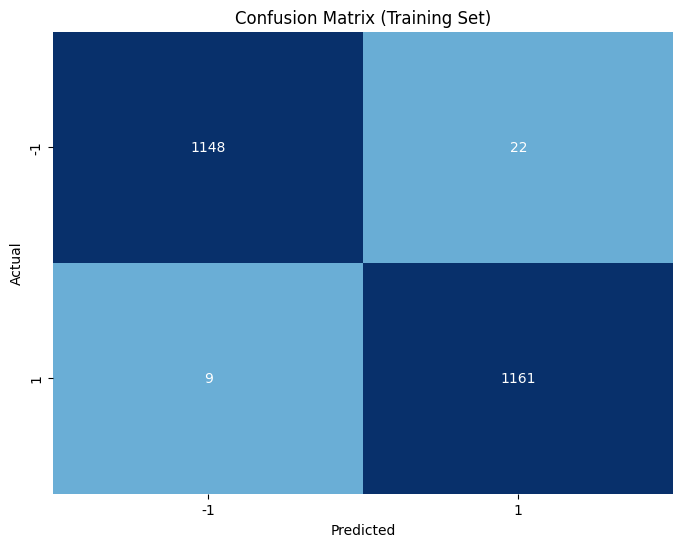


Test Metrics:
Precision: 0.9358108108108109
Recall: 0.9453924914675768
F1 Score: 0.9405772495755518
Accuracy: 0.9402730375426621

Classification Report (Test Set):
              precision    recall  f1-score   support

          -1       0.94      0.95      0.94       293
           1       0.94      0.94      0.94       293

    accuracy                           0.94       586
   macro avg       0.94      0.94      0.94       586
weighted avg       0.94      0.94      0.94       586


Confusion Matrix (Test Set):
[[277  16]
 [ 19 274]]


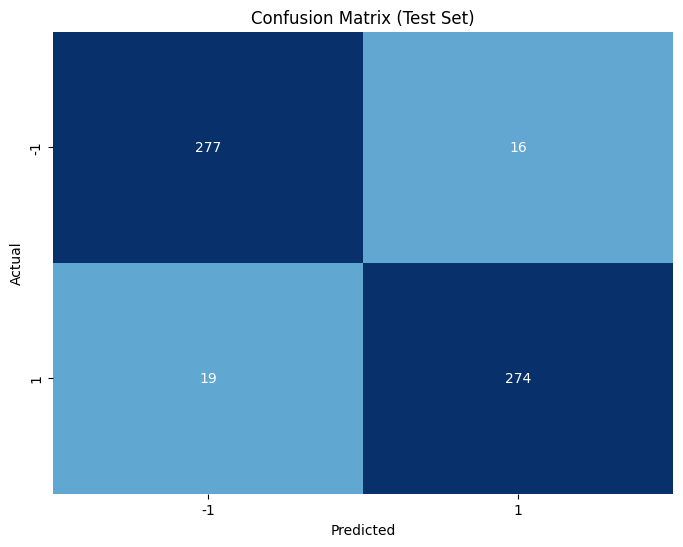

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = gb_classifier.predict(X_train)

# Make predictions on the test set
y_test_pred = gb_classifier.predict(X_test)

# Evaluation metrics for the training set
print("Training Metrics:")
print("Precision:", precision_score(y_train, y_train_pred, pos_label=-1))
print("Recall:", recall_score(y_train, y_train_pred, pos_label=-1))
print("F1 Score:", f1_score(y_train, y_train_pred, pos_label=-1))
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Classification Report for the training set
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Training Set):")
print(conf_matrix_train)

# Heatmap for the confusion matrix (Training Set)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False, center=0.5)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=[-1, 1])  # Adjust x-axis ticks for labels
plt.yticks(ticks=[0.5, 1.5], labels=[-1, 1])  # Adjust y-axis ticks for labels
plt.show()

# Evaluation metrics for the test set
print("\nTest Metrics:")
print("Precision:", precision_score(y_test, y_test_pred, pos_label=-1))
print("Recall:", recall_score(y_test, y_test_pred, pos_label=-1))
print("F1 Score:", f1_score(y_test, y_test_pred, pos_label=-1))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

# Classification Report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)

# Heatmap for the confusion matrix (Test Set)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False, center=0.5)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=[-1, 1])  # Adjust x-axis ticks for labels
plt.yticks(ticks=[0.5, 1.5], labels=[-1, 1])  # Adjust y-axis ticks for labels
plt.show()

Let's check the performance of the model on the PCA train set.

Training Metrics:
Precision: 0.9982788296041308
Recall: 0.9914529914529915
F1 Score: 0.9948542024013723
Accuracy: 0.9948717948717949

Classification Report (Training Set):
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99      1170
           1       0.99      1.00      0.99      1170

    accuracy                           0.99      2340
   macro avg       0.99      0.99      0.99      2340
weighted avg       0.99      0.99      0.99      2340


Confusion Matrix (Training Set):
[[1160   10]
 [   2 1168]]


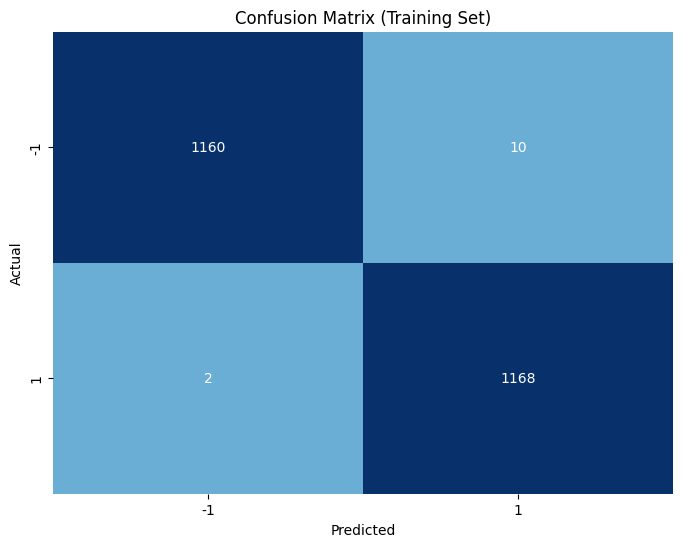


Test Metrics:
Precision: 0.9681978798586572
Recall: 0.9351535836177475
F1 Score: 0.951388888888889
Accuracy: 0.9522184300341296

Classification Report (Test Set):
              precision    recall  f1-score   support

          -1       0.97      0.94      0.95       293
           1       0.94      0.97      0.95       293

    accuracy                           0.95       586
   macro avg       0.95      0.95      0.95       586
weighted avg       0.95      0.95      0.95       586


Confusion Matrix (Test Set):
[[274  19]
 [  9 284]]


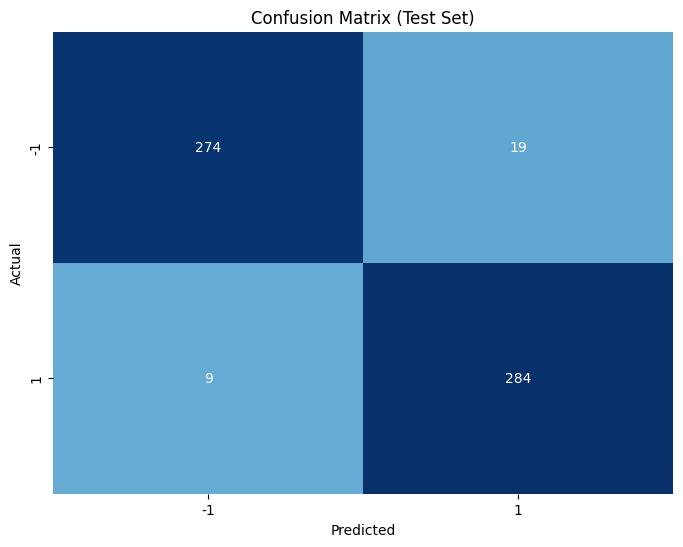

In [ ]:
# Fit the model to the training data
gb_classifier.fit(X_train_pca5, y_train)

# Make predictions on the training set
y_train_pred = gb_classifier.predict(X_train_pca5)

# Make predictions on the test set
y_test_pred = gb_classifier.predict(X_test_pca5)

# Evaluation metrics for the training set
print("Training Metrics:")
print("Precision:", precision_score(y_train, y_train_pred, pos_label=-1))
print("Recall:", recall_score(y_train, y_train_pred, pos_label=-1))
print("F1 Score:", f1_score(y_train, y_train_pred, pos_label=-1))
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# Classification Report for the training set
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Training Set):")
print(conf_matrix_train)

# Heatmap for the confusion matrix (Training Set)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False, center=0.5)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=[-1, 1])  # Adjust x-axis ticks for labels
plt.yticks(ticks=[0.5, 1.5], labels=[-1, 1])  # Adjust y-axis ticks for labels
plt.show()

# Evaluation metrics for the test set
print("\nTest Metrics:")
print("Precision:", precision_score(y_test, y_test_pred, pos_label=-1))
print("Recall:", recall_score(y_test, y_test_pred, pos_label=-1))
print("F1 Score:", f1_score(y_test, y_test_pred, pos_label=-1))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

# Classification Report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)

# Heatmap for the confusion matrix (Test Set)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False, center=0.5)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=[-1, 1])  # Adjust x-axis ticks for labels
plt.yticks(ticks=[0.5, 1.5], labels=[-1, 1])  # Adjust y-axis ticks for labels
plt.show()

* The Gradient Boost model fares even better on the PCA data with test accuracy of 95.22%.
* Both the precision (96.8) and recall (93.5) values are high suggesting that there are less false positives and false negatives.
* The F1 scores (95.18) are suggesting good balance between precision and recall.
* Treating the class imbalance helped reduce bias and improved model performance leading to a high model accuracy score.
* The difference between train accuracy and test accuracy is less than 5% indicating a stable model (no overfitting) and good bias variance tradeoff.
* More information regarding the features may have been provided to understand the relevance of each column, which would have helped in better data preparation.
* Also data with a balanced target column should have been provided to create a more reliable model, which need not require the use of oversampling techniques.